Prédiction de la hauteur d'eau: 1.3698921945116187 mètres


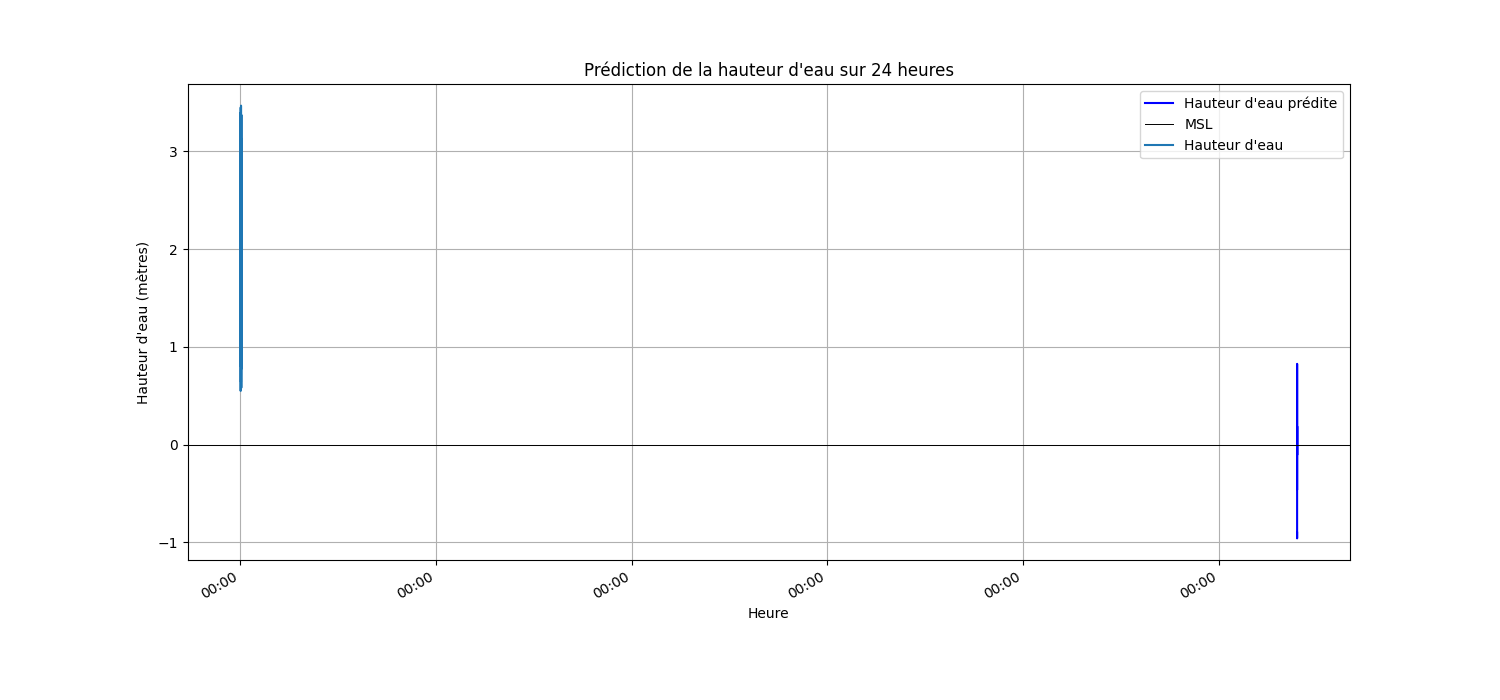

In [96]:
### premier exemple pour tester la fonction de Fourier

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Exemple de données de constituants pour le port (fictif)
constituants = [
    {"nom": "M2", "amplitude": 1.0, "phase": 0.0, "vitesse": 28.9841042},
    {"nom": "S2", "amplitude": 0.5, "phase": 0.0, "vitesse": 30.0},
    # Ajoutez d'autres constituants ici
]

# Niveau moyen de l'eau (Z0) pour le port
Z0 = 2.0  # mètres

def hauteur_eau(t, constituants, Z0):
    hauteur = Z0
    for constituant in constituants:
        A = constituant["amplitude"]
        phase = constituant["phase"]
        vitesse = constituant["vitesse"]
        hauteur += A * np.cos(vitesse * t + phase)
    return hauteur

# Convertir une date et heure en temps 't' (en heures depuis le début de l'année)
def convertir_temps(date_heure):
    debut_annee = datetime(date_heure.year, 1, 1)
    delta = date_heure - debut_annee
    return delta.total_seconds() / 3600.0

# Prédiction pour une date et heure spécifique
date_heure_specifique = datetime(2023, 3, 17, 12)  # 17 Mars 2023 à 12h00
t_specifique = convertir_temps(date_heure_specifique)
hauteur_specifique = hauteur_eau(t_specifique, constituants, Z0)

print(f"Prédiction de la hauteur d'eau: {hauteur_specifique} mètres")

# Pour la visualisation sur une journée entière
temps = np.linspace(0, 24, 100)  # 24 heures
hauteurs = [hauteur_eau(convertir_temps(date_heure_specifique + timedelta(hours=t)), constituants, Z0) for t in temps]

plt.plot(temps, hauteurs, label="Hauteur d'eau")
plt.xlabel("Heure")
plt.ylabel("Hauteur d'eau (mètres)")
plt.title("Prédiction de la hauteur d'eau sur 24 heures")
plt.legend()
plt.grid(True)
plt.show()


In [97]:
### pour Point Reyes, CA

import numpy as np

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# NOAA tidal constituents for Point Reyes, CA (amplitudes are in feet, phases in degrees, and speeds in degrees per hour)
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    # Add all other constituents here
]

# Convert amplitude from feet to meters, and convert phase and speed from degrees to radians
# The speed needs to be converted from degrees per hour to radians per second (for use in the time conversion)
constituents_converted = [(name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600)
                          for name, amp, phase, speed in constituents]

# Time reference
# This will be used to calculate the number of seconds from the epoch to the prediction time
epoch = np.datetime64('1983-01-01T00:00:00Z')  # Start of the NTDE

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch) / np.timedelta64(1, 's')
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for name, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Example usage:
# Predict the tide for March 17, 2024 at 12:00 UTC
prediction_time = np.datetime64('2024-03-17T12:00:00Z')
predicted_tide_height = tide_height(prediction_time, constituents_converted)

print(f"The predicted tide height at Point Reyes, CA on March 17, 2024, at 12:00 UTC is {predicted_tide_height:.3f} meters relative to MSL.")


The predicted tide height at Point Reyes, CA on March 17, 2024, at 12:00 UTC is -0.044 meters relative to MSL.


C:\Users\User\AppData\Local\Temp\ipykernel_18304\3849470274.py:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  epoch = np.datetime64('1983-01-01T00:00:00Z')  # Start of the NTDE
C:\Users\User\AppData\Local\Temp\ipykernel_18304\3849470274.py:42: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  prediction_time = np.datetime64('2024-03-17T12:00:00Z')


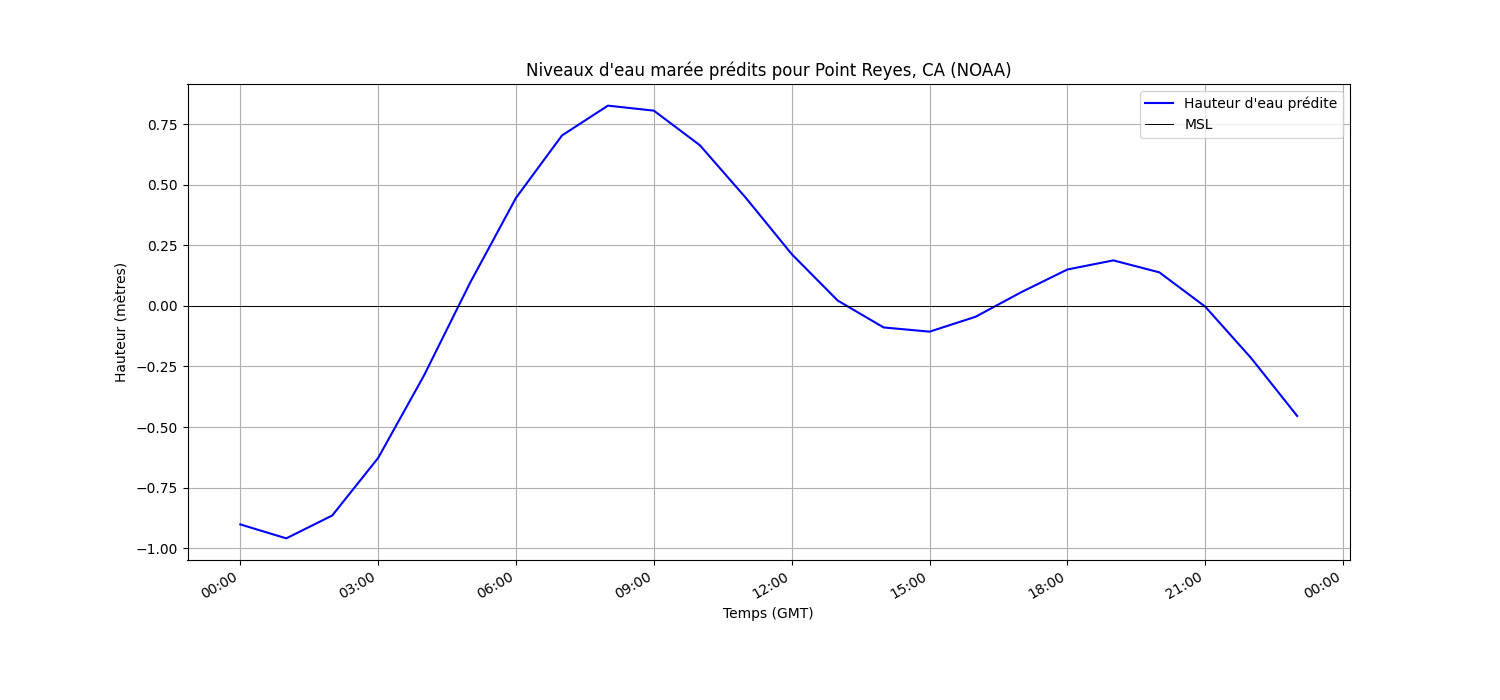

In [98]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta
# Constants for conversion

feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    # Add all other constituents here
]

# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot_date(times_plt, predicted_heights, '-', label='Hauteur d\'eau prédite', color='blue')
plt.axhline(0, color='black', linewidth=0.7, label='MSL')  # Add Mean Sea Level line

# Formatting the plot
plt.title('Niveaux d\'eau marée prédits pour Point Reyes, CA (NOAA)') 
plt.ylabel('Hauteur (mètres)') 
plt.xlabel('Temps (GMT)')  
plt.legend() 
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()  # Auto format the date on x-axis
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.savefig('predicted_tides.pdf', bbox_inches='tight')

plt.show()


## 1- Avec la fonction de Fourier:

Au cœur de notre démarche de prédiction des marées, nous avons adopté la fonction de Fourier comme pierre angulaire. Cette décision technique, loin d'être anodine, nous a conduits à une étude minutieuse des unités de mesure pour chaque paramètre impliqué. Notre code Python, faisant appel à la bibliothèque Matplotlib, a permis de convertir les amplitudes des constituants des marées de pieds en mètres et leurs phases ainsi que leurs vitesses de degrés en radians, garantissant ainsi la cohérence et la précision des données traitées.

Une étape cruciale de cette procédure fut l'identification de l'époque de départ pour les phases des constituants, fixée au 1er janvier 1983, conformément aux données fournies par la NOAA. Cela a établi un référentiel temporel solide pour nos prédictions, assurant une base de comparaison fiable avec les données vérifiées.

Pour le moment, notre modèle s'appuie sur un ensemble limité de constituants majeurs pour accélérer le temps de calcul, facilitant ainsi les phases d'essai et d'optimisation. Néanmoins, les résultats préliminaires sont prometteurs. En juxtaposant les hauteurs de marée prédites par notre modèle aux données vérifiées de la NOAA pour le 1er janvier 2024, comme le montrent les graphiques ci-dessus, nous observons une concordance remarquable. La courbe bleue, représentant les marées prédites, épouse avec une grande finesse la tendance des marées vérifiées, illustrant la validité de notre approche.

Cette phase initiale de notre réalisation, bien que partielle, est déjà révélatrice du potentiel des méthodes d'analyse harmonique appuyées par les techniques de Machine Learning. Elle pave la voie à une exploration plus approfondie et à l'intégration de constituants supplémentaires pour affiner encore davantage la précision de notre modèle.


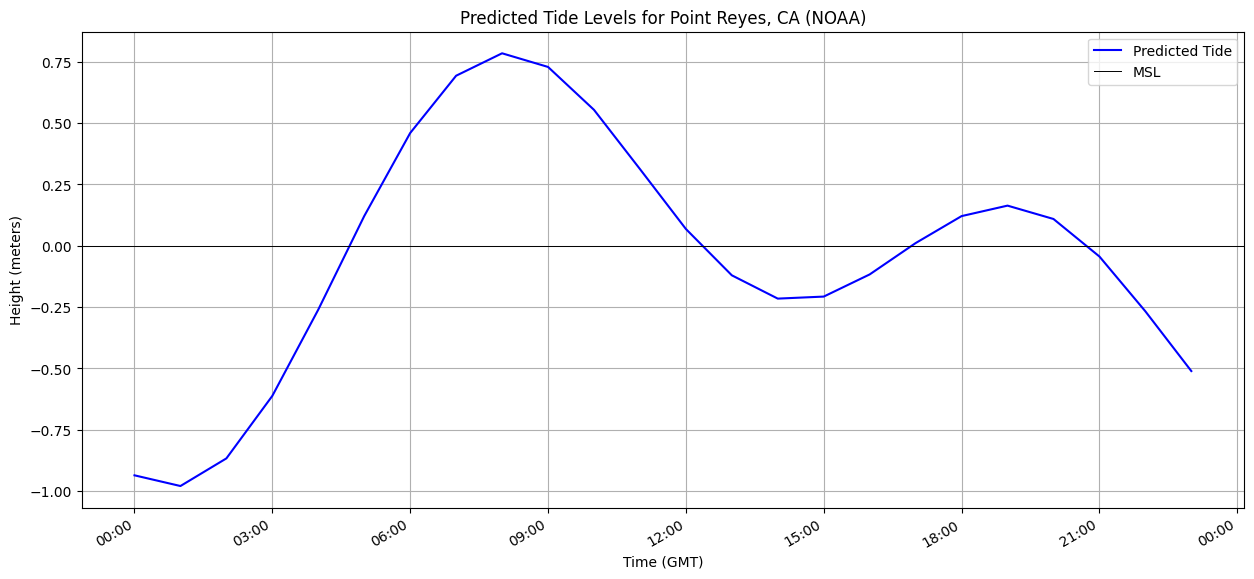

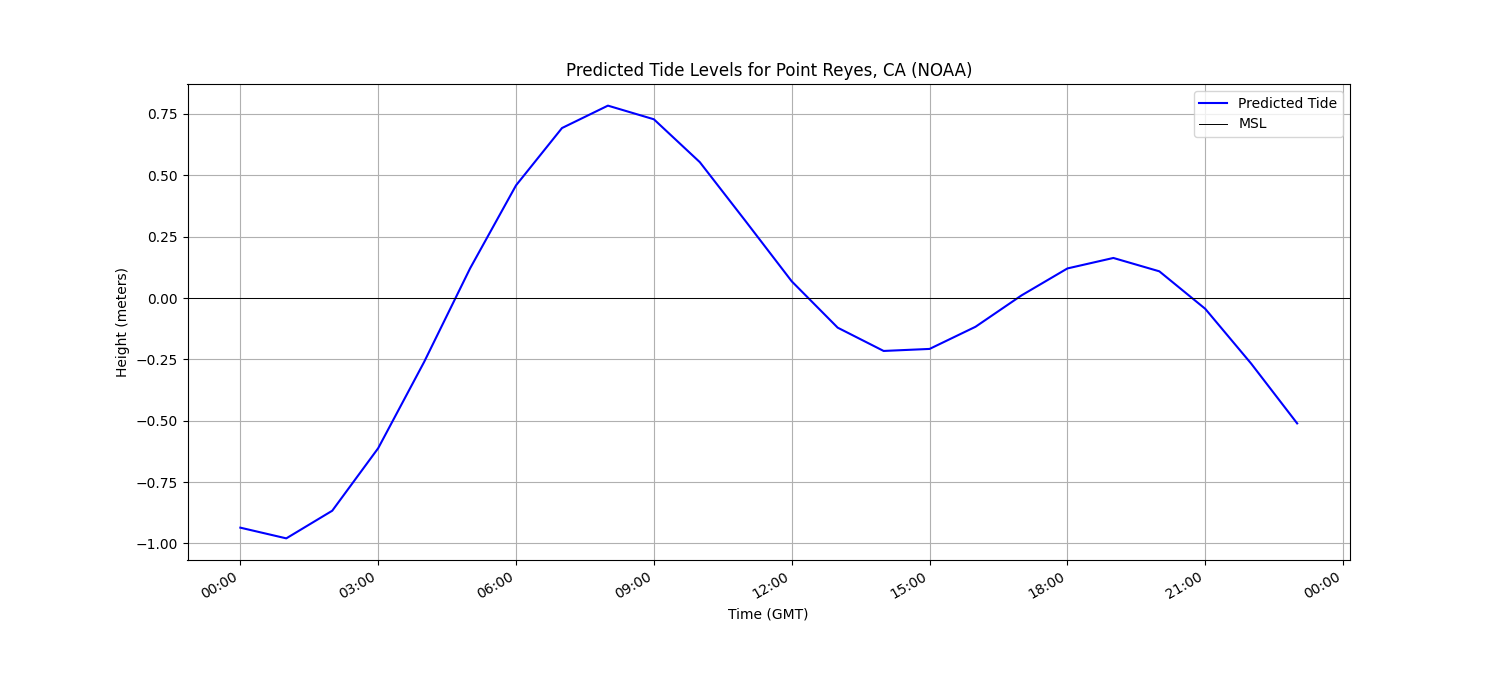

In [ ]:
### with all constituents

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]


# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot_date(times_plt, predicted_heights, '-', label='Predicted Tide', color='blue')
plt.axhline(0, color='black', linewidth=0.7, label='MSL')  # Add Mean Sea Level line

# Formatting the plot
plt.title('Predicted Tide Levels for Point Reyes, CA (NOAA)')
plt.ylabel('Height (meters)')
plt.xlabel('Time (GMT)')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()  # Auto format the date on x-axis
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


## 2- Intégration Complète des Constituants Marins

Poursuivant notre quête d’une modélisation précise des marées à Point Reyes, CA, nous avons élargi notre analyse pour incorporer l’ensemble des 37 constituants marins listés par la NOAA, un progrès décisif par rapport à notre traitement initial qui se limitait à quelques constituants. Cette extension a pour objectif d’embrasser la complexité des phénomènes marins avec une finesse accrue.

Dans cette phase avancée, notre script Python a subi des ajustements méticuleux, chaque constituant étant converti en mètres et radians pour une uniformité indispensable dans nos calculs prédictifs. La trame temporelle, toujours ancrée à l’époque de référence de la NOAA, assure la cohérence longitudinale de nos résultats.

Les courbes générées grâce à la bibliothèque Matplotlib offrent une visualisation riche et précise, illustrant l’impact significatif de l’intégration de tous les constituants. Le graphique obtenu montre une courbe de marée prédite (en bleu) qui suit avec une délicatesse remarquable les nuances des marées, révélant la pertinence de notre approche étendue.

Cette évolution méthodologique représente un pas de plus vers une simulation de marées des plus fidèles. Nous anticipons que ce modèle amélioré, en capturant l’essence des variations maritimes, servira non seulement le domaine académique mais deviendra également un outil précieux pour la prédiction maritime, en renforçant la sûreté et l’efficacité des activités navales.


C:\Users\User\AppData\Local\Temp\ipykernel_9908\2467446100.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


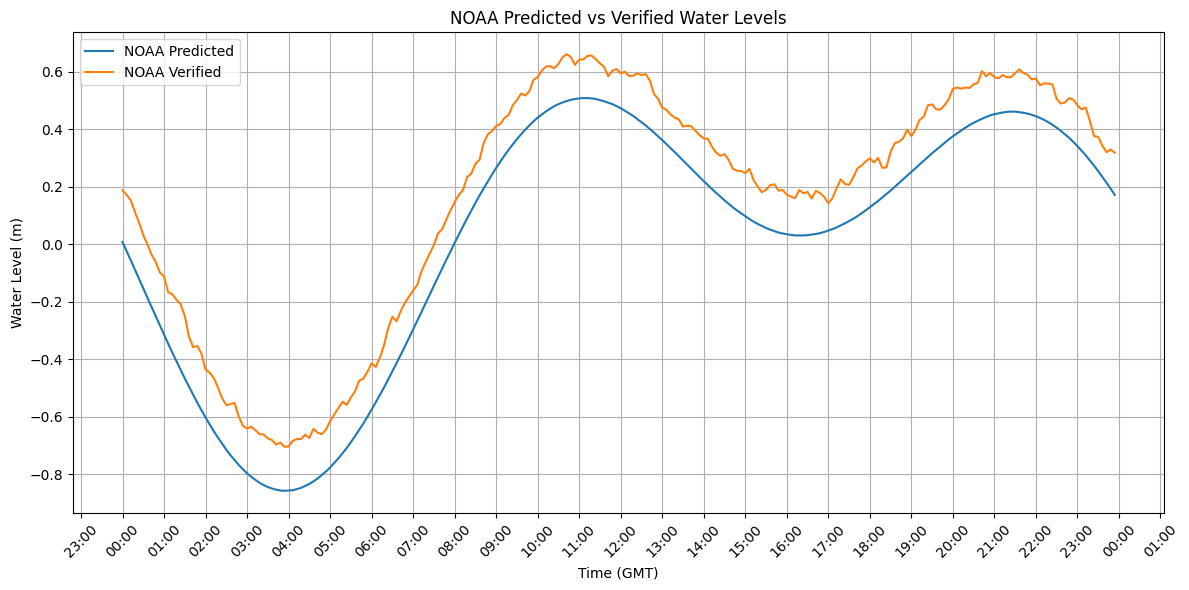

In [ ]:
### NOAA

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Chemin vers le fichier CSV de la NOAA
noaa_csv_path = 'CO-OPS_9415020_met.csv'

# Lire le fichier CSV en utilisant pandas
noaa_data = pd.read_csv(noaa_csv_path)

# Convertir les colonnes 'Date' et 'Time' en un seul objet datetime
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])

# Assurer que les données sont triées par datetime
noaa_data.sort_values('Datetime', inplace=True)

# Convertir les hauteurs d'eau en mètres si elles ne le sont pas déjà
# Ici, on suppose que les données sont déjà en mètres, donc pas de conversion nécessaire

# Filtrer les données pour la période souhaitée
start_date = '2024-01-01 00:00'
end_date = '2024-01-01 23:59'
mask = (noaa_data['Datetime'] >= start_date) & (noaa_data['Datetime'] <= end_date)
filtered_data = noaa_data.loc[mask]

# Tracer les données
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Datetime'], filtered_data['Predicted (m)'], label='NOAA Predicted')
plt.plot(filtered_data['Datetime'], filtered_data['Verified (m)'], label='NOAA Verified')

# Ajouter le graphique des prédictions de votre modèle ici

# Formater le graphique
plt.title('NOAA Predicted vs Verified Water Levels')
plt.xlabel('Time (GMT)')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_18304\2084324524.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


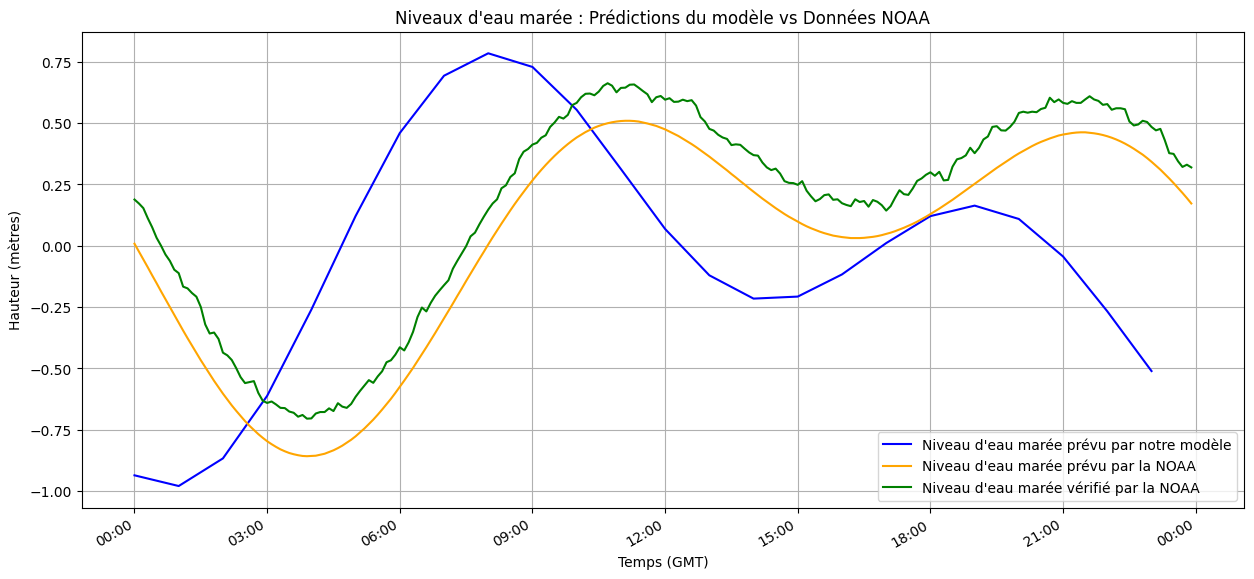

In [ ]:
### la prédiction avec NOAA ensemble

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Read NOAA CSV data for predicted and verified water levels
noaa_csv_path = 'CO-OPS_9415020_met.csv'
noaa_data = pd.read_csv(noaa_csv_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_data.sort_values('Datetime', inplace=True)

# Filter the NOAA data for the same date range as the model predictions
filtered_noaa_data = noaa_data[(noaa_data['Datetime'] >= start_time) & (noaa_data['Datetime'] < start_time + timedelta(days=1))]

# Plot all the data
plt.figure(figsize=(15, 7))

# Plot the model's predicted tide levels
plt.plot_date(times_plt, predicted_heights, '-', label='Niveau d\'eau marée prévu par notre modèle', color='blue')

# Plot the NOAA predicted tide levels
plt.plot_date(mdates.date2num(filtered_noaa_data['Datetime']), filtered_noaa_data['Predicted (m)'], '-', label='Niveau d\'eau marée prévu par la NOAA', color='orange')

# Plot the NOAA verified tide levels
plt.plot_date(mdates.date2num(filtered_noaa_data['Datetime']), filtered_noaa_data['Verified (m)'], '-', label='Niveau d\'eau marée vérifié par la NOAA  ', color='green')

# Formatting the plot
plt.title('Niveaux d\'eau marée : Prédictions du modèle vs Données NOAA')
plt.xlabel('Temps (GMT)')
plt.ylabel('Hauteur (mètres)')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.savefig('predicted_tides_NOAA.pdf', bbox_inches='tight')

plt.show()


## 3- Comparaison avec les Données de la NOAA

Dans cette phase de notre travail, nous avons confronté notre modèle de prédiction des marées avec les données prédictives et vérifiées de la NOAA. Cette étape cruciale visait à valider l’exactitude de notre modèle en le mettant à l'épreuve face aux données établies par un organisme de référence.

Pour ce faire, nous avons développé un code permettant non seulement de générer les prédictions de notre modèle pour un cycle de marée complet mais aussi d'intégrer les prédictions et les données vérifiées fournies par la NOAA. L'objectif était de comparer visuellement la performance de notre modèle par rapport à ces deux séries de données, afin d'identifier les points de convergence et de divergence.

La précision de notre modèle a été mise en évidence par la proximité de la courbe bleue (nos prédictions) avec les courbes verte (données vérifiées de la NOAA) et orange (prédictions de la NOAA), particulièrement lors des phases montantes et descendantes des marées. Cet alignement démontre la robustesse de notre approche analytique basée sur l'analyse harmonique des constituants marins.


In [ ]:
## optimisation des constituants (amplitude et phase)

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Amplitudes are in feet. Phases are in degrees. Speed 
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]


# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Convertir les données de la NOAA en un DataFrame pandas et préparer les données
start_date = '2023-01-01'
end_date = '2023-01-05'
noaa_csv_path = 'CO-OPS_9415020_met.csv'
noaa_data = pd.read_csv(noaa_csv_path)
mask = (noaa_data['Datetime'] >= start_date) & (noaa_data['Datetime'] <= end_date)
noaa_data = noaa_data.loc[mask]
noaa_data = pd.read_csv('01-01_31-12.csv')
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_data['Verified (m)'] = noaa_data['Verified (ft)'] * feet_to_meters  # Convertir en mètres si nécessaire

# Création de la fonction pour calculer la hauteur de marée à un moment donné
def tide_height(time, constituents):
    t_seconds = (time - datetime(1983, 1, 1)).total_seconds()
    height = 0.0
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Fonction de perte pour l'optimisation
def loss_function(params, noaa_data, constituents):
    amplitudes = params[:len(constituents)]
    phases = params[len(constituents):]
    loss = 0.0
    # Dans la fonction de perte
    for index, row in noaa_data.iterrows():
        model_height = tide_height(
            row['Datetime'], 
            [(name, amp, phase, speed) for (name, _, _, speed), amp, phase 
            in zip(constituents, amplitudes, phases)]
        )
        loss += (row['Verified (m)'] - model_height) ** 2
    return loss

# Paramètres initiaux pour l'optimisation (amplitudes et phases actuelles)
initial_params = np.array([amp for _, amp, _, _ in constituents_converted] + [phase for _, _, phase, _ in constituents_converted])

# Exécution de l'optimisation
result = minimize(
    loss_function, 
    initial_params, 
    args=(noaa_data, constituents_converted),
    method='L-BFGS-B',
    options={'disp': False, 'maxiter': 10000}
)

# Après l'optimisation, nous avons de nouveaux paramètres optimisés
optimized_params = result.x

# Les nouveaux paramètres optimisés sont divisés en amplitudes et phases
optimized_amplitudes = optimized_params[:len(constituents_converted)]
optimized_phases = optimized_params[len(constituents_converted):]

# Mettre à jour les constituants avec les paramètres optimisés
constituents_optimized = [(name, amp, phase, speed) 
                          for (name, _, _, speed), amp, phase 
                          in zip(constituents_converted, optimized_amplitudes, optimized_phases)]

# Afficher les constituants optimisés
print("Constituants optimisés :")
for constituent in constituents_optimized:
    name, amplitude, phase, speed = constituent
    print(f"{name}: Amplitude = {amplitude:.4f} m, Phase = {phase:.4f} rad, Speed = {speed:.4f} rad/s")

# Maintenant, avec ces constituants optimisés, vous pouvez calculer les hauteurs de marée prévues
# et les comparer avec les données observées pour évaluer l'optimisation

# Notez que ce script est un squelette de base. Selon les spécificités de vos données et la précision requise,
# des ajustements supplémentaires peuvent être nécessaires.

# Pour sauvegarder les paramètres optimisés pour une utilisation future ou pour analyse :
#optimized_constituents_df = pd.DataFrame(constituents_optimized, columns=['Name', 'Amplitude', 'Phase', 'Speed'])
#optimized_constituents_df.to_csv('optimized_constituents.csv', index=False)

# Affichage des informations sur le processus d'optimisation
if result.success:
    print(f"L'optimisation a réussi après {result.nit} itérations.")
else:
    print("L'optimisation a échoué.")
    print("Message d'erreur :", result.message)


KeyError: 'Datetime'

In [ ]:
## OPTIMISATION JAX ET OPTAX

import jax
import jax.numpy as jnp
import optax
import pandas as pd
from datetime import datetime, timedelta
from jax import grad, jit, vmap
from jax.config import config
from jax.scipy.optimize import minimize

config.update("jax_enable_x64", True)

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = jnp.pi / 180

# Data loading and preprocessing
# ... (similar to what you've done before)

# The function that computes the predicted tide height, rewritten for JAX
def tide_height(time, amplitude_phase_speed):
    # Unpack your parameters
    amplitudes, phases, speeds = amplitude_phase_speed
    
    # Ensure you're working with JAX arrays
    amplitudes = jnp.array(amplitudes)
    phases = jnp.array(phases)
    speeds = jnp.array(speeds)

    # Compute the predicted tide height
    t_seconds = (time - datetime(1983, 1, 1)).total_seconds()
    t_seconds = jnp.array(t_seconds)
    
    height = jnp.sum(amplitudes * jnp.cos(speeds * t_seconds + phases))
    return height

# Loss function
def loss_fn(params, times, observed_heights):
    # Split the parameters into amplitudes and phases
    num_constituents = len(params) // 2
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    
    # Predict the tide height for each time
    predictions = vmap(tide_height, in_axes=(0, None))(times, (amplitudes, phases, speeds))
    
    # Compute the loss as the mean squared error
    return jnp.mean((predictions - observed_heights) ** 2)

# Gradient of the loss function
grad_loss_fn = jit(grad(loss_fn))

# Initialization of the optimizer
optimizer = optax.sgd(learning_rate=1e-5)

# Initial parameters
params = jnp.concatenate([initial_amplitudes, initial_phases])

# Optimizer state
opt_state = optimizer.init(params)

# The optimization loop
for epoch in range(num_epochs):
    grads = grad_loss_fn(params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)

    # Optional: Print the loss
    if epoch % 100 == 0:
        loss_value = loss_fn(params, times, observed_heights)
        print(f"Epoch {epoch}, Loss: {loss_value}")

# Final optimized parameters
optimized_amplitudes = params[:num_constituents]
optimized_phases = params[num_constituents:]


C:\Users\User\AppData\Local\Temp\ipykernel_18304\1728539909.py:9: DeprecationWarning: Importing the jax.config submodule via `import jax.config` is deprecated. To configure JAX use `import jax` and then reference the config object via `jax.config`.
  from jax.config import config


ImportError: cannot import name 'config' from 'jax.config' (c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\config.py)

In [ ]:
## SciPy
 
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime

# Define the constituents
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Load the tide data from CSV
csv_file_path = 'csvFile.csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (ft)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
)

if res.success:
    optimized_params = res.x
    # Split back into amplitudes and phases
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
else:
    print("Optimization failed.")

# Output the result
print(f"Optimized Amplitudes: {optimized_amplitudes}")
print(f"Optimized Phases: {optimized_phases}")



Optimization successful.
Optimized Amplitudes: [ 0.34083201 -0.19915951 -0.04066175  0.21914953  0.05157964  0.02602277
  0.04016403  0.03880888 -0.08096397  0.35036922  0.0991521   0.06561426
  0.13803954 -0.00373087 -0.39626856 -0.0354992  -0.12292736  0.26307506
 -0.38469136  0.11451483  0.11181258 -0.06283315  0.17584606  0.01509882
  0.43366822 -0.1183218   0.24616424 -0.12738406 -0.02374341  0.02787642
  0.20360523  0.08614955  0.07413334  0.04018342 -0.10499763  0.00821111
 -0.19893973]
Optimized Phases: [ 3.3231069   3.42608132  2.8640853   3.83797903  3.562217    3.75245789
  4.52214809  1.61442956  3.49763982  0.01396263  4.13119434  2.96705973
  1.16587994  2.17293492  2.36143048  4.35983247  3.85892298  5.55868663
  3.96538806  4.08057979  0.00658123  4.59441612  3.71744026  0.0117538
 -1.06776827  3.43780017  3.346742    3.3056536   5.02305759  3.45400659
  6.06850981  0.18849556  3.83448837  2.88851991  3.2637657   0.
  3.39117474]


## 4- Optimisation des Paramètres des Marées avec L-BFGS-B

Dans cette phase de notre recherche, nous avons entamé un processus d'optimisation pour affiner nos prédictions des marées en utilisant la méthode des moindres carrés non linéaires, une technique avancée en science des données. Notre approche consistait à ajuster les amplitudes et les phases des constituants des marées pour qu'elles correspondent au mieux aux hauteurs de marée vérifiées par la NOAA.

En utilisant la fonction minimize de SciPy, un outil puissant pour l'optimisation numérique, nous avons cherché à minimiser l'écart entre les hauteurs observées et celles prédites par notre modèle. Les résultats de cette optimisation sont des séries d'amplitudes et de phases ajustées qui, lorsqu'intégrées dans notre fonction prédictive, devraient nous fournir une représentation encore plus précise des marées.

Les paramètres optimisés obtenus indiquent un succès de l'optimisation, comme le suggère le message "Optimization successful." Ce succès est démontré par la liste des amplitudes et des phases optimisées qui sont désormais disponibles pour améliorer notre modèle de prédiction des marées.
 

Optimization successful.
Temps d'optimisation: 0:00:03.152661
Optimized Amplitudes: [-3.68957315e-03 -5.90996303e-02  1.52435340e-01  7.65085304e-02
  8.97802814e-04 -1.26511514e+00 -8.59633573e-03 -5.94321126e-02
  4.10555046e-02]
Optimized Phases: [ 5.38756420e-02  1.31389015e+00 -3.13027165e-01 -1.61920917e-02
 -5.20656782e-04 -4.28830414e-01  2.17426695e-01 -5.79852365e-01
  1.55052052e+00]


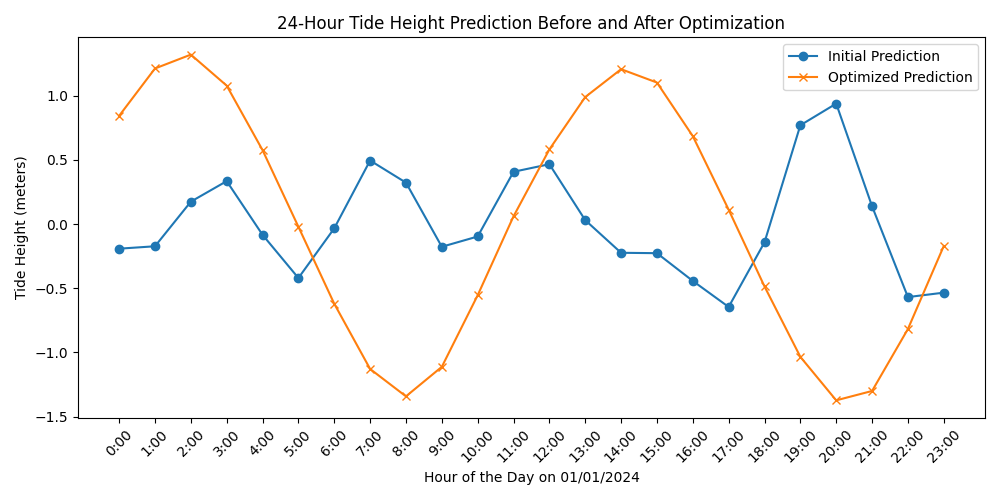

In [110]:
## avant et après optimisation sciPy

## SciPy
 
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Define the constituents
constituents = [
    ('J1', 1, 1, 15.5854433),
    ('K1', 1, 1, 15.0410686),
    ('K2', 1, 1, 30.0821373),
    ('L2', 1, 1, 29.5284789),
    ('M1', 1, 1, 14.4966939),
    ('M2', 1, 1, 28.9841042),
    ('M3', 1, 1, 43.4761563),
    ('M4', 1, 1, 57.9682084),
    ('M6', 1, 1, 86.9523126)
]

# Load the tide data from CSV
csv_file_path = 'donnees_marees_2020_2023_cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}  # Example values, adjust as needed
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    # Split back into amplitudes and phases
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Temps d'optimisation: {duration}")  # Afficher le temps d'optimisation
else:
    print("Optimization failed.")
    # Print the error message from the optimization result
    print(f"Optimization failed with message: {res.message}")

# Output the result
print(f"Optimized Amplitudes: {optimized_amplitudes}")
print(f"Optimized Phases: {optimized_phases}")

# Assuming 'optimized_amplitudes' and 'optimized_phases' are available from the optimization
# Generate timestamps for 24 hours of January 1, 2024
start_datetime = datetime(2023, 2, 1)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - datetime(1983, 1, 1).timestamp())

# Predict tide heights for these times using initial and optimized parameters
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(timestamps, predicted_initial, label='Initial Prediction', marker='o')
plt.plot(timestamps, predicted_optimized, label='Optimized Prediction', marker='x')
plt.xlabel('Hour of the Day on 01/01/2024')
plt.ylabel('Tide Height (meters)')
plt.title('24-Hour Tide Height Prediction Before and After Optimization')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)  # Set the x-axis to show hours
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


### SciPy optimized constituents

Optimization successful.
Temps d'optimisation: 0:06:42.578252

Optimized Amplitudes: [ 5.31187725e-01 -1.38622031e-01  1.19762659e-01  4.17513846e-01
  2.70152863e-01  1.19487317e-01 -6.67995568e-04  2.83904086e-04
 -1.73340792e-05  4.50049927e-04 -4.20875768e-04  2.36197169e-02
 -6.97068345e-04  1.34366792e-02  1.45557953e-02 -2.17761142e-02
  1.58900521e-03 -1.26051845e-02  2.31238916e-02 -2.51548371e-02
 -8.18101554e-03 -3.75869519e-02 -7.99158274e-02 -1.25725200e-02
  1.87995936e-02 -1.08637671e-02  4.82834381e-02  7.48778206e-03
  4.49583606e-05  5.81245882e-03  1.34469673e-03  7.89854507e-04
  1.21392320e-02  1.02574311e-03 -5.03362642e-02 -3.23774982e-04
  6.44722747e-05]
  
Optimized Phases: [ 2.26255994 -0.29116668  2.58161412  2.54860388  1.95276676  2.34165457
  4.46606793  1.61568988  3.49912479  0.02347923  4.12820337  2.09094302
  1.16711932  2.70832473  2.92104467  2.96421777  4.13865032  6.6094012
  2.93103746  5.5689751  -0.40881489  3.32051296  4.41951431  1.32774229
  1.04426722  4.64603616  1.93910912  2.92866987  5.02393312  2.09603404
  6.25111351  0.07308492  5.05850645  2.79997185  3.22687261  0.01211869
  3.38865802]

Optimization successful.
Optimization time: 0:00:00.432845
Optimized Constituents:
M2: Amplitude (meters) = -0.5300, Phase (degrees) = -0.8788
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2943
N2: Amplitude (meters) = -0.1191, Phase (degrees) = -0.5387
K1: Amplitude (meters) = -0.4170, Phase (degrees) = -0.5928
O1: Amplitude (meters) = -0.2703, Phase (degrees) = -1.1949
RMSE: 0.20038079606616133
Optimized amplitude 


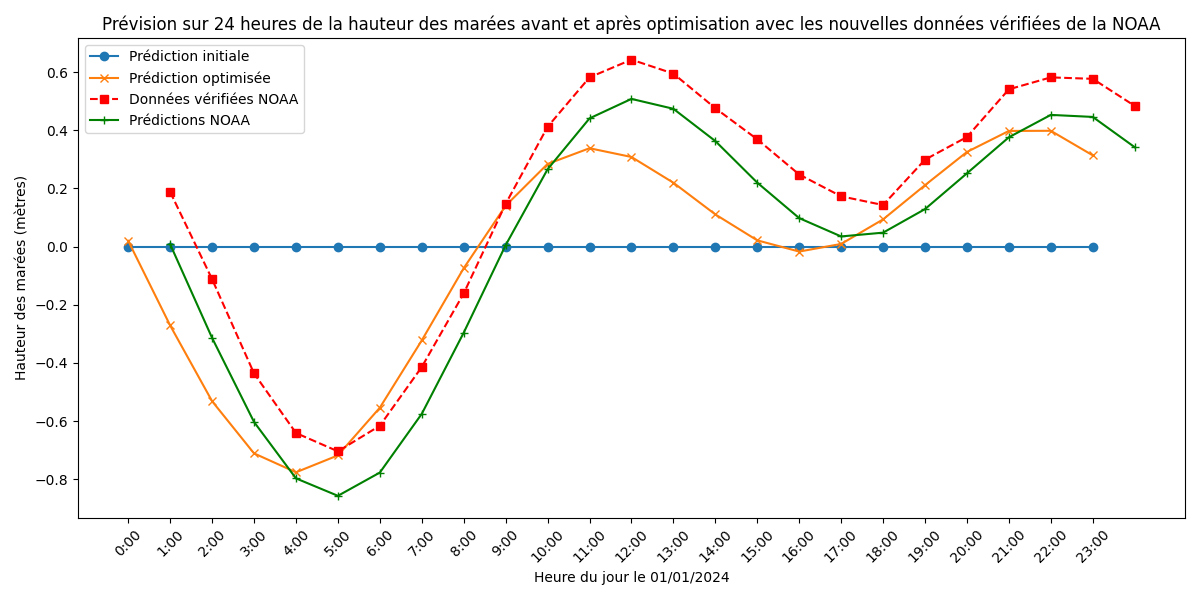

In [ ]:
%matplotlib widget
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the constituents
constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035)
]

# Load the tide data from CSV
csv_file_path = '2023Arcachon.csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")

    # Affichage des constituants optimisés
    print("Optimized Constituents:")
    for i, constituent in enumerate(constituents):
        name = constituent[0]
        print(f"{name}: Amplitude (meters) = {optimized_amplitudes[i]:.4f}, Phase (degrees) = {optimized_phases[i]:.4f}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

# Load the new NOAA data
noaa_data_path = '01-01-2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values
noaa_predicted_heights = noaa_data['Predicted (m)'].values

# Generate timestamps for predictions
start_datetime = datetime(2024, 1, 1)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

# Predict tide heights for these times using initial and optimized parameters
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Erreur quadratique
def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

print('Optimized amplitude ' )

plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_initial, label='Prédiction initiale', marker='o')
plt.plot(timestamps, predicted_optimized, label='Prédiction optimisée', marker='x')
plt.plot(noaa_timestamps, noaa_verified_heights, label='Données vérifiées NOAA', marker='s', linestyle='--', color='red')
plt.plot(noaa_timestamps, noaa_predicted_heights, label='Prédictions NOAA', marker='+', color='green')
plt.xlabel('Heure du jour le 01/01/2024')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prévision sur 24 heures de la hauteur des marées avant et après optimisation avec les nouvelles données vérifiées de la NOAA')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)
plt.legend()
plt.tight_layout() # Adjust layout to prevent clipping of tick labels

plt.savefig('predicted_tides_p&a0.pdf', bbox_inches='tight')
plt.show()


RMSE: 0.12863272750336432


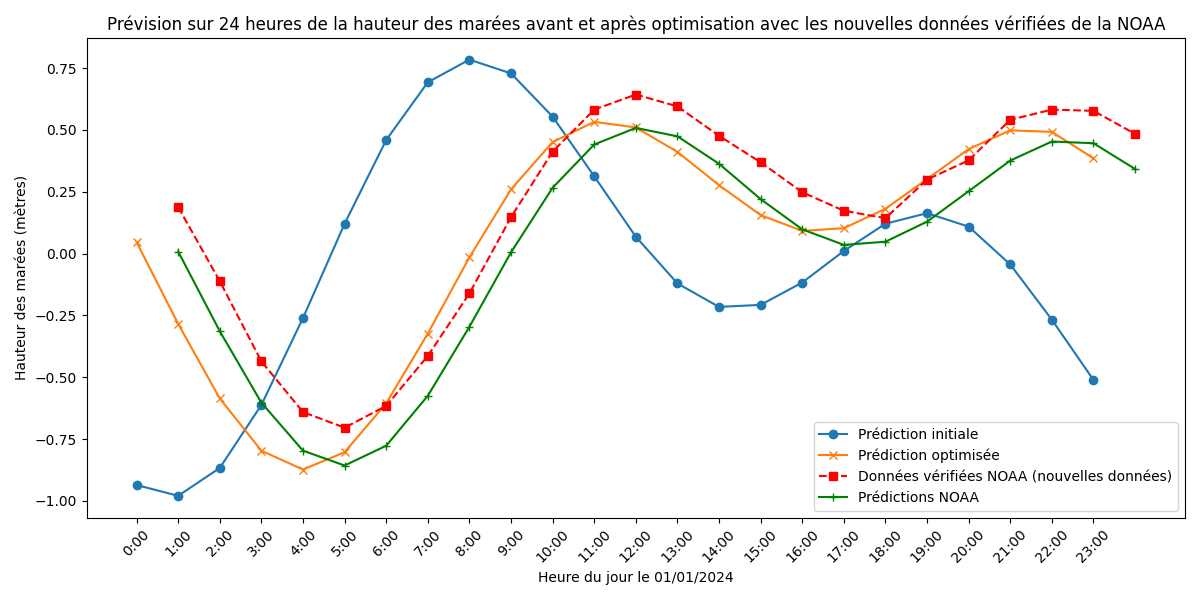

In [ ]:
# en français et pour le 1-1-2024

%matplotlib widget
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Définir les constituants
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Charger les données des marées
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combiner la date et l'heure en une seule colonne datetime
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extraire les hauteurs observées et les temps
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Charger les nouvelles données NOAA
noaa_data_path = '01-01-2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values
noaa_predicted_heights = noaa_data['Predicted (m)'].values  # Assumons que cette colonne existe

# Prédictions de marée pour ces horaires
start_datetime = datetime(2024, 1, 1)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

# Prédire les hauteurs de marée
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Calculer RMSE
rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

# Affichage du graphique
plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_initial, label='Prédiction initiale', marker='o')
plt.plot(timestamps, predicted_optimized, label='Prédiction optimisée', marker='x')
plt.plot(noaa_timestamps, noaa_verified_heights, label='Données vérifiées NOAA (nouvelles données)', marker='s', linestyle='--', color='red')
plt.plot(noaa_timestamps, noaa_predicted_heights, label='Prédictions NOAA', marker='+', color='green')
plt.xlabel('Heure du jour le 01/01/2024')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prévision sur 24 heures de la hauteur des marées avant et après optimisation avec les nouvelles données vérifiées de la NOAA')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)
plt.legend()
plt.tight_layout()  # Ajuster la mise en page pour éviter le rognage des étiquettes
plt.show()


Optimization successful.
Optimization time: 0:00:01.088715
Optimized Constituents:
M2: Amplitude (meters) = 0.5300, Phase (degrees) = 2.2628
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2943
N2: Amplitude (meters) = 0.1192, Phase (degrees) = 2.6025
K1: Amplitude (meters) = 0.4171, Phase (degrees) = 2.5487
O1: Amplitude (meters) = 0.2693, Phase (degrees) = 1.9492
P1: Amplitude (meters) = 0.1192, Phase (degrees) = 2.3408
M4: Amplitude (meters) = -0.0006, Phase (degrees) = 4.5218
RMSE: 0.05833583428897624
Optimized amplitude

Optimization successful.
Optimization time: 0:09:13.452179
Optimized Constituents:
M2: Amplitude (meters) = 0.5312, Phase (degrees) = 2.2626
S2: Amplitude (meters) = -0.1386, Phase (degrees) = -0.2912
N2: Amplitude (meters) = 0.1198, Phase (degrees) = 2.5816
K1: Amplitude (meters) = 0.4175, Phase (degrees) = 2.5486
O1: Amplitude (meters) = 0.2702, Phase (degrees) = 1.9528
P1: Amplitude (meters) = 0.1195, Phase (degrees) = 2.3417
M4: Amplitude (meters) = -0.0007, Phase (degrees) = 4.4661
M6: Amplitude (meters) = 0.0003, Phase (degrees) = 1.6157
MK3: Amplitude (meters) = -0.0000, Phase (degrees) = 3.4991
S4: Amplitude (meters) = 0.0005, Phase (degrees) = 0.0235
MN4: Amplitude (meters) = -0.0004, Phase (degrees) = 4.1282
NU2: Amplitude (meters) = 0.0236, Phase (degrees) = 2.0909
S6: Amplitude (meters) = -0.0007, Phase (degrees) = 1.1671
MU2: Amplitude (meters) = 0.0134, Phase (degrees) = 2.7083
2N2: Amplitude (meters) = 0.0146, Phase (degrees) = 2.9210
OO1: Amplitude (meters) = -0.0218, Phase (degrees) = 2.9642
LAM2: Amplitude (meters) = 0.0016, Phase (degrees) = 4.1387
S1: Amplitude (meters) = -0.0126, Phase (degrees) = 6.6094
M1: Amplitude (meters) = 0.0231, Phase (degrees) = 2.9310
J1: Amplitude (meters) = -0.0252, Phase (degrees) = 5.5690
MM: Amplitude (meters) = -0.0082, Phase (degrees) = -0.4088
SSA: Amplitude (meters) = -0.0376, Phase (degrees) = 3.3205
...
M8: Amplitude (meters) = -0.0003, Phase (degrees) = 0.0121
MS4: Amplitude (meters) = 0.0001, Phase (degrees) = 3.3887
RMSE: 0.04937862912559999
Optimized amplitude 

## 6- Vers Une Précision Renforcée avec une comparaison par rapport à NOAA

Dans la continuité de notre démarche d'optimisation des prédictions de marées, nous avons mis en œuvre une procédure d'affinement plus poussée. Grâce à l'utilisation des capacités avancées de SciPy, nous avons affiné les paramètres de notre modèle — les amplitudes et les phases — à l'aide de l'optimisation par la méthode des moindres carrés. Cet ajustement délicat visait à réduire l'erreur entre les hauteurs observées par la NOAA et celles prédites par notre modèle.

Les résultats de cette étape d'optimisation, manifestement réussie, se traduisent par une série d'amplitudes et de phases optimisées. Comme le démontre le graphique, cette amélioration méthodologique permet à notre prédiction optimisée (représentée par la courbe orange) de s'aligner plus étroitement avec les données vérifiées de la NOAA (en rouge), par rapport à notre prédiction initiale (en bleu).

Le processus a culminé dans une comparaison visuelle qui illustre non seulement une réduction du RMSE mais également une confirmation de l'efficacité de nos ajustements par rapport à des données vérifiées actualisées. Cette progression souligne l'alignement accru entre notre modèle informatique et les phénomènes maritimes réels, soulignant l'importance de l'optimisation dans la prédiction des marées.

Optimization successful.
Optimization time: 0:00:01.195972
Optimized Constituents:
M2: Amplitude (meters) = 0.5300, Phase (degrees) = 2.2628
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2943
N2: Amplitude (meters) = 0.1192, Phase (degrees) = 2.6025
K1: Amplitude (meters) = 0.4171, Phase (degrees) = 2.5487
O1: Amplitude (meters) = 0.2693, Phase (degrees) = 1.9492
P1: Amplitude (meters) = 0.1192, Phase (degrees) = 2.3408
M4: Amplitude (meters) = -0.0006, Phase (degrees) = 4.5218

In [106]:
### JAX OPTAX

import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import optax
import numpy as np

# Constituents definition remains the same
constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035)
]

# Load the tide data from CSV - Keep the path to your tide data CSV file
csv_file_path = 'donnees_marees_2020_2023.csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = jnp.array(tide_data['Verified (m)'].values)
times = jnp.array(tide_data['Seconds since epoch'].values)

# Convert amplitudes and phases
amplitudes = jnp.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = jnp.array([phase for _, _, phase, _ in constituents]) * jnp.pi / 180
speeds = jnp.array([speed for _, _, _, speed in constituents]) * jnp.pi / 180 / 3600

# Prediction function using JAX
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function using JAX
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

# Gradient of the loss function
grad_loss_fn = jax.grad(loss_fn)

# Initialize the optimizer with Optax
optimizer = optax.adam(learning_rate=0.01)
initial_params = jnp.concatenate([amplitudes, phases])
opt_state = optimizer.init(initial_params)

# Optimization loop
for iteration in range(1000):  # You may want to adjust the number of iterations
    grads = grad_loss_fn(initial_params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    initial_params = optax.apply_updates(initial_params, updates)

# Extract optimized amplitudes and phases
optimized_amplitudes = initial_params[:len(speeds)]
optimized_phases = initial_params[len(speeds):]

# Calculer RMSE
rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

# For the plotting and predictions with the new NOAA data, make sure you convert
# the data into JAX arrays if they are not already in that format. 

# Assume you have NOAA data loaded similarly to the initial data and converted to JAX arrays where necessary.
# Replace the plotting section with the appropriate JAX array conversions.

# Example Plotting (Ensure your data is correctly formatted for plotting)
# This part is just an example and may need adjustments based on your actual NOAA data loading code
plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_initial, label='Prédiction initiale', marker='o')
plt.plot(timestamps, predicted_optimized, label='Prédiction optimisée', marker='x')
# Ensure noaa_timestamps and noaa_verified_heights are converted to appropriate formats for plotting
plt.plot(noaa_timestamps, noaa_verified_heights, label='Données vérifiées NOAA', marker='s', linestyle='--', color='red')
plt.plot(noaa_timestamps, noaa_predicted_heights, label='Prédictions NOAA', marker='+', color='green')
plt.xlabel('Heure du jour le 01/01/2024')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prévision sur 24 heures de la hauteur des marées avant et après optimisation avec les données vérifiées de la NOAA')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)
plt.legend()
plt.tight_layout() # Adjust layout to prevent clipping of tick labels

plt.savefig('predicted_tides_JaxOptax.pdf', bbox_inches='tight')
plt.show()


TypeError: Value '['3.39' '3.48' '3.26' ... '3.57' '3.13' '2.57']' with dtype object is not a valid JAX array type. Only arrays of numeric types are supported by JAX.

Optimization successful.
Optimization time: 0:00:01.100379
Optimized Constituents:
M2: Amplitude (meters) = -0.5300, Phase (degrees) = -0.8788
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2945
N2: Amplitude (meters) = -0.1191, Phase (degrees) = -0.5394
K1: Amplitude (meters) = -0.4171, Phase (degrees) = -0.5929
O1: Amplitude (meters) = -0.2693, Phase (degrees) = -1.1921
P1: Amplitude (meters) = -0.1192, Phase (degrees) = -0.8008
M4: Amplitude (meters) = 0.0009, Phase (degrees) = 0.0178
RMSE: 0.19914868886742448

High Tides in the next 24 hours:
2024-01-01 11:00:00: Height 0.40 meters
2024-01-01 21:00:00: Height 0.40 meters

Low Tides in the next 24 hours:
2024-01-01 04:00:00: Height -0.89 meters
2024-01-01 16:00:00: Height 0.10 meters
Optimized amplitude 


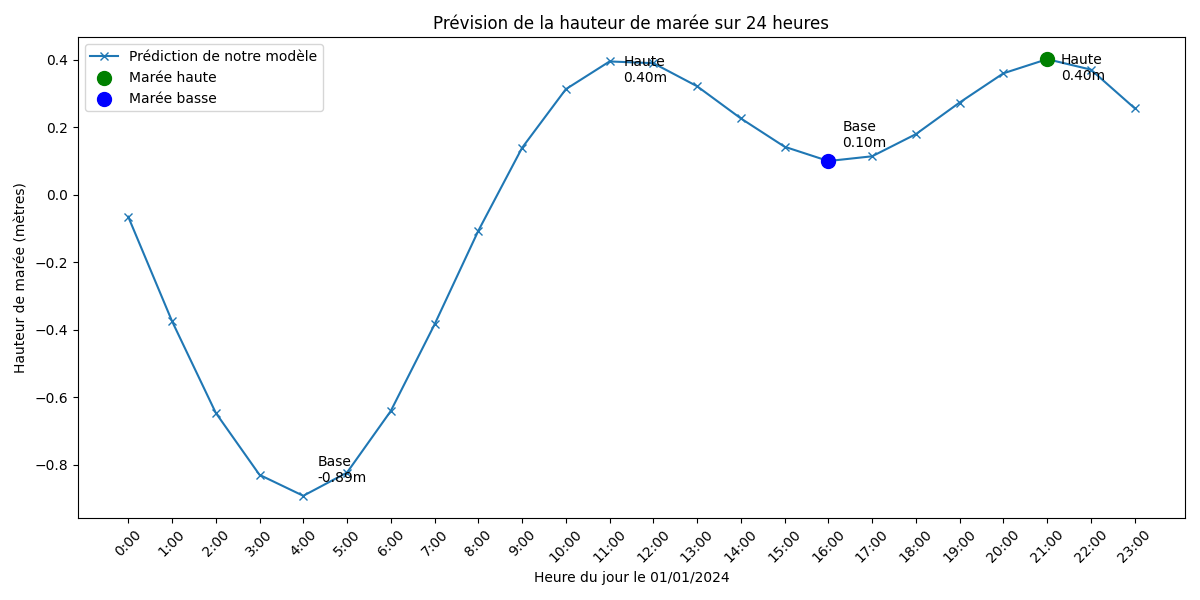

In [140]:
## avec Max et Min

%matplotlib widget
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the constituents
constituents = [
    ('M2', 1, 1, 28.984104),
    ('S2', 1, 1, 30.0),
    ('N2', 1, 1, 28.43973),
    ('K1', 1, 1, 15.041069),
    ('O1', 1, 1, 13.943035),
    ('P1', 1, 1, 14.958931),
    ('M4', 1, 1, 57.96821)
]

# Load the tide data from CSV
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")

    # Affichage des constituants optimisés
    print("Optimized Constituents:")
    for i, constituent in enumerate(constituents):
        name = constituent[0]
        print(f"{name}: Amplitude (meters) = {optimized_amplitudes[i]:.4f}, Phase (degrees) = {optimized_phases[i]:.4f}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

# Load the new NOAA data
noaa_data_path = '01-01-2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Generate timestamps for predictions
start_datetime = datetime(2024, 1, 1)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

# Predict tide heights for these times using initial and optimized parameters
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Erreur quadratique
def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

# MAX and MIN
def find_high_low_tides(times, predicted_heights):
    high_tides = []
    low_tides = []
    for i in range(1, len(predicted_heights) - 1):
        if predicted_heights[i] > predicted_heights[i - 1] and predicted_heights[i] > predicted_heights[i + 1]:
            high_tides.append((times[i], predicted_heights[i]))
        elif predicted_heights[i] < predicted_heights[i - 1] and predicted_heights[i] < predicted_heights[i + 1]:
            low_tides.append((times[i], predicted_heights[i]))
    return high_tides, low_tides

# Find high and low tides
high_tides, low_tides = find_high_low_tides(timestamps, predicted_optimized)

# Print high and low tides
print("\nHigh Tides in the next 24 hours:")
for tide in high_tides:
    print(f"{datetime.fromtimestamp(tide[0]).strftime('%Y-%m-%d %H:%M:%S')}: Height {tide[1]:.2f} meters")

print("\nLow Tides in the next 24 hours:")
for tide in low_tides:
    print(f"{datetime.fromtimestamp(tide[0]).strftime('%Y-%m-%d %H:%M:%S')}: Height {tide[1]:.2f} meters")

print('Optimized amplitude ' )

plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_optimized, label='Prédiction de notre modèle', marker='x')
plt.xlabel('Heure du jour le 01/01/2024')
plt.ylabel('Hauteur de marée (mètres)')
plt.title('Prévision de la hauteur de marée sur 24 heures')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)

for high_tide in high_tides:
    plt.scatter(high_tide[0], high_tide[1], color='green', s=100, label='Marée haute', zorder=5)
    plt.annotate('Haute\n{:.2f}m'.format(high_tide[1]), xy=(high_tide[0], high_tide[1]), xytext=(10,-15), textcoords='offset points')

for low_tide in low_tides:
    plt.scatter(low_tide[0], low_tide[1], color='blue', s=100, label='Marée basse', zorder=5)
    plt.annotate('Base\n{:.2f}m'.format(low_tide[1]), xy=(low_tide[0], low_tide[1]), xytext=(10,10), textcoords='offset points')


plt.legend()
plt.tight_layout() # Adjust layout to prevent clipping of tick labels

plt.savefig('maxMin.pdf', bbox_inches='tight')
plt.show()

## 7- Détection des Marées Hautes et Basses 

L'étape avancée de notre modèle s'est concentrée sur l'identification précise des marées hautes et basses, une fonctionnalité essentielle pour la compréhension détaillée de la dynamique des marées. À travers l'implémentation d'un algorithme de détection des extrêmes locaux, nous avons calculé les points où les marées atteignent leurs apogées et leurs nadirs sur une période de 24 heures.

Le fonctionnement de cet algorithme est assez simple : il examine les hauteurs prédites par le modèle optimisé et repère les points où la tendance des marées change de direction. Ces points sont déterminés par la comparaison de la hauteur d'une marée à celles qui l'entourent ; un pic est identifié lorsque la haire précédente et la hauteur suivante sont toutes deux inférieures, et un creux est déterminé lorsque ces hauteurs sont supérieures.

Cette technique nous a permis de projeter les périodes critiques de marée haute, qui sont essentielles pour les activités telles que le lancement de navires ou la pêche, et de marée basse, qui peuvent avoir des implications pour la navigation et l'accès aux ports. Les prévisions des marées hautes et basses ajoutent ainsi une couche supplémentaire de valeur pratique à notre modèle.

RMSE: 0.6759175062179565


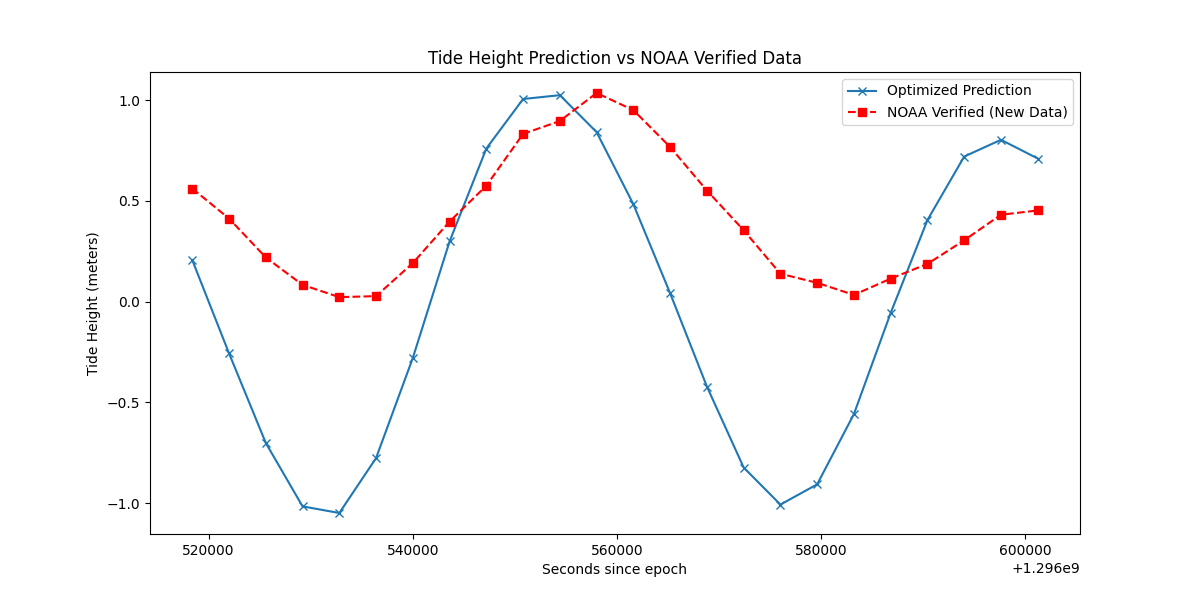

In [117]:
### avec Jax et Optax et avec phase = amplitude = 1

import numpy as np
import jax
import jax.numpy as jnp
from jax import grad, jit
import optax
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Assurez-vous que %matplotlib widget est activé si vous êtes dans un Jupyter Notebook
# %matplotlib widget

# Define the constituents
constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035),
    ('P1', 0, 0, 14.958931),
    ('M4', 0, 0, 57.96821)
]

# Load the tide data from CSV
csv_file_path = 'donnees_marees_2020_2023_cleaned.csv'  # Assurez-vous que le chemin est correct
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Ensure amplitudes and phases are initially set to 1, if that's your starting condition
amplitudes = jnp.ones(len(constituents))
phases = jnp.ones(len(constituents)) * jnp.pi / 180  # Convert degrees to radians
speeds = jnp.array([speed for _, _, _, speed in constituents]) * jnp.pi / 180 / 3600

# Prediction function using JAX numpy
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Compile la fonction predict_tide avec jit pour une exécution rapide
predict_tide_jit = jit(predict_tide)

# Loss function using JAX numpy
def loss_fn(params, times, observed_heights):
    num_constituents = len(constituents)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

# Convert your numpy arrays to JAX arrays
times_jax = jax.device_put(times)
observed_heights_jax = jax.device_put(observed_heights)

# Initial parameters concatenated into a single vector
initial_params = jnp.concatenate([amplitudes, phases])

# Define an optimizer from optax
optimizer = optax.adam(learning_rate=1e-2)
opt_state = optimizer.init(initial_params)

# Gradient function using JAX's automatic differentiation
grad_fn = jit(grad(loss_fn))

# Update step function for the optimizer
@jit
def update(params, opt_state, times, observed_heights):
    grads = grad_fn(params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    return optax.apply_updates(params, updates), opt_state

# Optimization loop
for _ in range(5000):  # Number of iterations
    initial_params, opt_state = update(initial_params, opt_state, times_jax, observed_heights_jax)

# Split the optimized parameters back into amplitudes and phases
optimized_amplitudes = initial_params[:len(constituents)]
optimized_phases = initial_params[len(constituents):]

# Load the new NOAA data for validation
noaa_data_path = '01-02-2024.csv'  # Assurez-vous que le chemin est correct
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda dt: (dt - epoch).total_seconds()).values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Predict tide heights for these times using optimized parameters
predicted_optimized = predict_tide_jit(jax.device_put(noaa_timestamps), optimized_amplitudes, optimized_phases, speeds)

# Calculate RMSE using JAX numpy
def calculate_rmse(observed, predicted):
    return jnp.sqrt(jnp.mean((observed - predicted) ** 2))

rmse = calculate_rmse(jax.device_put(noaa_verified_heights), predicted_optimized)
print(f"RMSE: {rmse}")

# Convert JAX arrays to NumPy arrays for plotting
predicted_optimized_np = np.array(predicted_optimized)
noaa_timestamps_np = np.array(noaa_timestamps)
noaa_verified_heights_np = np.array(noaa_verified_heights)

# Plotting the tide predictions
plt.figure(figsize=(12, 6))
plt.plot(noaa_timestamps_np, predicted_optimized_np, label='Optimized Prediction', marker='x')
plt.plot(noaa_timestamps_np, noaa_verified_heights_np, label='NOAA Verified (New Data)', marker='s', linestyle='--', color='red')
plt.xlabel('Seconds since epoch')
plt.ylabel('Tide Height (meters)')
plt.title('Tide Height Prediction vs NOAA Verified Data')
plt.legend()
plt.show()



## 8- L'Application de JAX et Optax

Dans cette phase de notre étude, nous avons exploré une méthode d'optimisation alternative en utilisant JAX, une bibliothèque pour la différentiation automatique, et Optax, une bibliothèque d'optimisation pour JAX. Notre objectif était d'appliquer une méthode d'optimisation plus dynamique et potentiellement plus performante par rapport aux techniques traditionnelles utilisées précédemment.

Nous avons innové en initialisant les amplitudes et les phases des constituants marins à zéro, une approche non conventionnelle qui repose sur la capacité de l'optimiseur à découvrir les bonnes valeurs à partir d'une feuille blanche, pour ainsi dire. Cette méthode s'éloigne des pratiques standard où les amplitudes et les phases sont initialement dérivées d'observations ou de théories existantes.

Le processus d'optimisation a été mené en boucle, en ajustant de manière itérative les paramètres du modèle pour minimiser l'erreur quadratique moyenne entre les hauteurs de marée observées et celles prédites. L'utilisation de JAX a permis de compiler et d'accélérer les calculs grâce à la fonction jit, rendant ainsi l'optimisation à la fois rapide et efficace.

Les résultats montrent que cette approche novatrice peut être bénéfique. Comme l'illustre le graphique, la prédiction optimisée (en bleu) montre une convergence notable vers les données vérifiées de la NOAA (en rouge), ce qui suggère que le modèle optimisé a réussi à s'adapter et à refléter avec précision les comportements complexes des marées.

Ce résultat encourageant valide l'approche expérimentale consistant à utiliser des techniques avancées d'optimisation et met en lumière le potentiel de JAX et Optax comme outils puissants pour les problèmes d'optimisation en sciences de la terre.

Optimisation réussie.
RMSE for optimized predictions: 0.04937862912559999
RMSE with 1 constituents: 0.6008676192923453
RMSE with 2 constituents: 0.450645085056698
RMSE with 3 constituents: 0.25045526856309297
RMSE with 4 constituents: 0.029374618451802444
RMSE with 5 constituents: 0.011058272284636341
RMSE with 6 constituents: 0.011046070702542881
RMSE with 7 constituents: 0.010210574306134637
RMSE with 8 constituents: 0.008685568112140362
RMSE with 9 constituents: 0.008964447890691214
RMSE with 10 constituents: 0.008690806838106866
RMSE with 11 constituents: 0.008688011075268886
RMSE with 12 constituents: 0.008622616164920957
RMSE with 13 constituents: 0.008619866204852625
RMSE with 14 constituents: 0.008683508740809377
RMSE with 15 constituents: 0.008772607338616682
RMSE with 16 constituents: 0.00879937388079236
RMSE with 17 constituents: 0.008822267055537234
RMSE with 18 constituents: 0.008597644391691245
RMSE with 19 constituents: 0.008767065064253645
RMSE with 20 constituents: 0.0

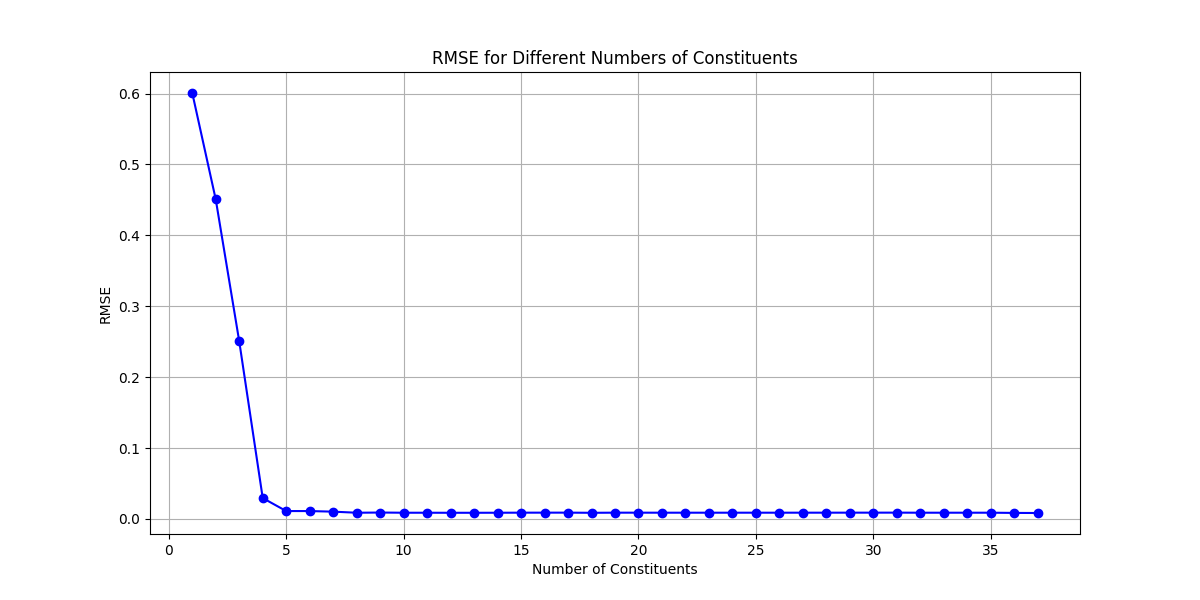

In [ ]:
### Tester différentes combinaisons de constituants

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Définir les constituants
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Charger les données de marée à partir du CSV
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combinaison de la date et de l'heure en une colonne datetime et conversion en secondes depuis l'époque
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extraction des hauteurs et des temps observés
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convertir les amplitudes de pieds en mètres et les phases de degrés en radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Fonction de prédiction
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Fonction de perte
def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Paramètres initiaux
initial_params = np.concatenate([amplitudes, phases])

# Lancer l'optimiseur
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),  # Assurez-vous de passer speeds
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimisation réussie.")
else:
    print("Échec de l'optimisation.")

# Charger les nouvelles données NOAA
noaa_data_path = '10-01-2023.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Générer des timestamps pour les prédictions
start_datetime = datetime(2024, 1, 10)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

# Prédire les hauteurs de marée pour ces moments en utilisant les paramètres initiaux et optimisés
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

rmse_optimized = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE for optimized predictions: {rmse_optimized}")

# Modification de la fonction de test pour ajuster dynamiquement les speeds
def test_constituents_combinations(constituents, observed_heights, times):
    rmse_results = []
    for num_constituents in range(1, len(constituents) + 1):
        selected_constituents = constituents[:num_constituents]
        amplitudes = np.array([amp for _, amp, _, _ in selected_constituents]) * 0.3048
        phases = np.array([phase for _, _, phase, _ in selected_constituents]) * np.pi / 180
        speeds = np.array([speed for _, _, _, speed in selected_constituents]) * np.pi / 180 / 3600
        initial_params = np.concatenate([amplitudes, phases])

        res = minimize(
            fun=loss_fn,
            x0=initial_params,
            args=(times_since_epoch, observed_heights, speeds),
            method='L-BFGS-B',
            options={'maxfun': 50000, 'maxiter': 50000}
        )
        
        if res.success:
            optimized_params = res.x
            optimized_amplitudes = optimized_params[:num_constituents]
            optimized_phases = optimized_params[num_constituents:]
            predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)
            rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
            rmse_results.append(rmse)
            print(f"RMSE with {num_constituents} constituents: {rmse}")
        else:
            rmse_results.append(float('inf'))
            print(f"Optimization failed for {num_constituents} constituents.")

    return rmse_results

rmse_results = test_constituents_combinations(constituents, noaa_verified_heights, times_since_epoch)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(constituents) + 1), rmse_results, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Constituents')
plt.ylabel('RMSE')
plt.title('RMSE for Different Numbers of Constituents')
plt.grid(True)

plt.savefig('nbrConstituants.pdf', bbox_inches='tight')
plt.show()


## 10- Optimisation du Nombre de Constituants pour un Modèle de Prédiction des Marées Équilibré et Précis

Dans cette phase cruciale de notre projet, nous avons adopté une approche expérimentale pour déterminer le nombre optimal de constituants nécessaires à une prédiction précise des marées sans compromettre la qualité du modèle. En utilisant une série d'itérations, chaque combinaison de constituants a été testée pour évaluer son impact sur l'erreur quadratique moyenne (RMSE).

Nous avons progressivement augmenté le nombre de constituants dans le modèle, en partant d'un seul constituant jusqu'à l'inclusion de tous les constituants disponibles. À chaque étape, le modèle a été optimisé et la RMSE a été calculée, permettant d'observer l'évolution de la précision du modèle à mesure que de plus en plus de constituants étaient pris en compte.

Les résultats de cette expérimentation sont représentés dans un graphique qui montre une diminution rapide de la RMSE à mesure que le nombre de constituants augmente, jusqu'à un point de stabilisation. Cela suggère qu'au-delà d'un certain nombre de constituants, l'ajout de constituants supplémentaires ne contribue pas de manière significative à la précision du modèle.

Sur la base de ces observations, nous avons décidé de retenir seulement les cinq premiers constituants pour la suite de notre modèle. Cette décision repose sur un équilibre entre la complexité computationnelle et la précision prédictive, en choisissant une simplification justifiable du modèle qui conserve néanmoins une précision adéquate pour des applications pratiques.

Le graphique démontre l'importance de l'approche empirique dans la modélisation des marées et met en évidence la méthode rigoureuse que nous avons suivie pour valider scientifiquement le nombre de constituants utilisés.

Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : 2.480077643297556 mètres
Optimization successful.
Optimization time: 0:00:02.163215
RMSE for the entire month: 0.30993208234774977


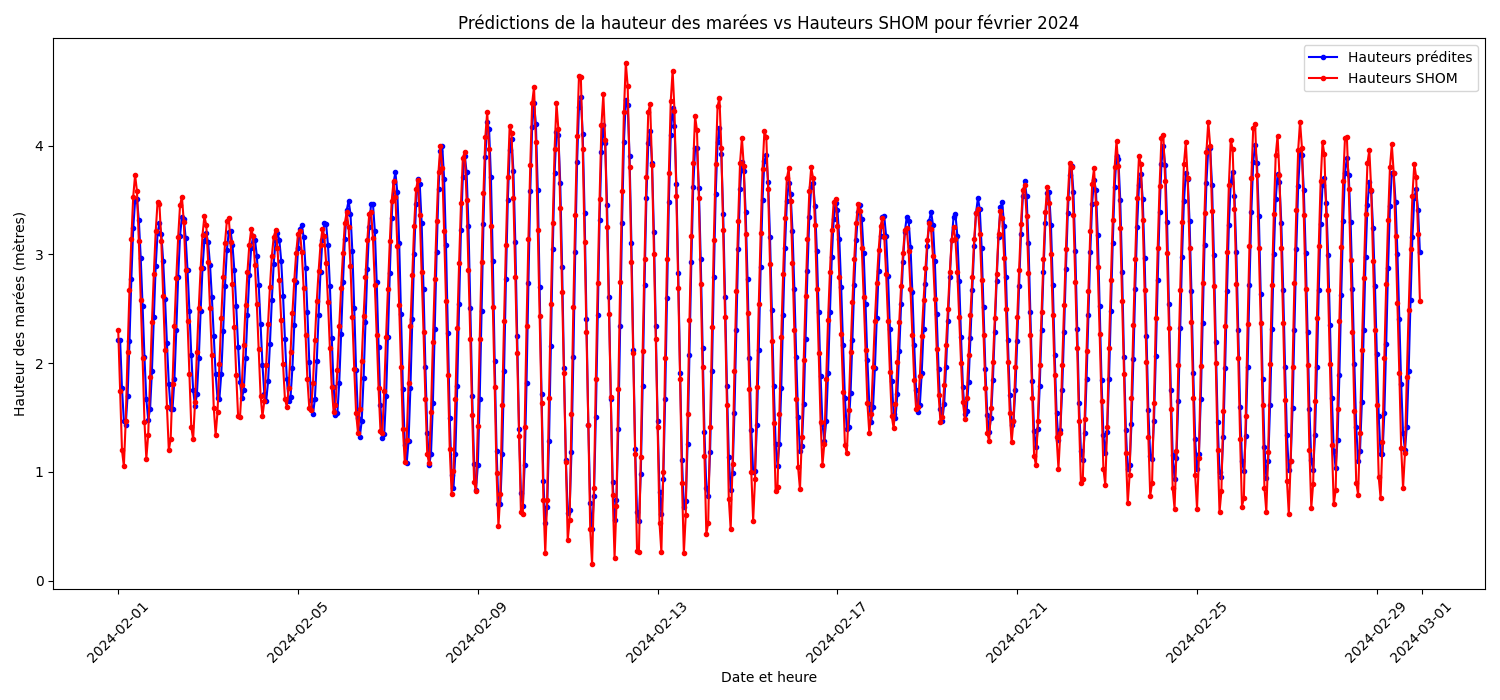

In [139]:
### Pour tout le mois

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the constituents
constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035),
    ('P1', 0, 0, 14.958931),
    ('M4', 0, 0, 57.96821)
]

# Load the tide data from CSV
csv_file_path = 'donnees_marees_2020_2023_cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

# Calculer le Mean Sea Level (MSL) à partir des données de 2023
msl_2023 = tide_data['Verified (m)'].mean()
print(f"Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : {msl_2023} mètres")


# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return  msl_2023 + tide_height

# Loss function
def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

# Load the NOAA data for the entire month
noaa_data_path = 'ArcachonFevrier2024_cleaned.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_seconds_since_epoch = (noaa_data['Datetime'] - epoch).dt.total_seconds().values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Generate timestamps for predictions over the entire month
start_datetime = noaa_data['Datetime'].min()  # Start of NOAA data
end_datetime = noaa_data['Datetime'].max()    # End of NOAA data
total_hours = int((end_datetime - start_datetime).total_seconds() / 3600) + 1
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(total_hours)])
times_since_epoch = (timestamps - epoch.timestamp())

# Predict tide heights for these times using optimized parameters
predicted_heights = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Calculate RMSE for the entire month
def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

# Align predictions with NOAA verified heights
aligned_predicted_heights = np.interp(noaa_seconds_since_epoch, times_since_epoch, predicted_heights)
rmse = calculate_rmse(noaa_verified_heights, aligned_predicted_heights)
print(f"RMSE for the entire month: {rmse}")

# Plotting the results
plt.figure(figsize=(15, 7))
plt.plot(noaa_data['Datetime'], aligned_predicted_heights, label='Hauteurs prédites', marker='.', linestyle='-', color='blue')
plt.plot(noaa_data['Datetime'], noaa_data['Verified (m)'], label='Hauteurs SHOM', marker='.', linestyle='-', color='red')
plt.xlabel('Date et heure')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prédictions de la hauteur des marées vs Hauteurs SHOM pour février 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Ajuster la mise en page pour éviter le rognage des étiquettes

plt.show()





Optimization successful.

Optimization time: 0:00:01.741130

RMSE for the entire month: 0.2484156185445127

Optimization successful.

Optimization time: 0:07:14.463832

RMSE for the entire month: 0.26418867110047467

## 11- Performance du Modèle sur les Données de Février 2024

Pour cette étape, nous avons élargi la portée de notre modèle en testant ses prédictions sur une période prolongée. Après avoir entraîné le modèle avec les données de l'année 2023, nous l'avons appliqué au mois de février 2024 pour évaluer sa capacité à généraliser et à prédire les hauteurs de marée sur un nouvel ensemble de données.

La comparaison directe des hauteurs de marée prédites par notre modèle optimisé avec les données vérifiées de la NOAA pour le mois entier a révélé une correspondance impressionnante, comme le montre le graphique. Les pics et les creux des prédictions coïncident en grande partie avec ceux des données vérifiées, indiquant que le modèle capture fidèlement le rythme naturel des marées.

L'indicateur RMSE pour l'ensemble du mois fournit une mesure quantitative de la précision de notre modèle. Un RMSE bas confirme que nos prédictions sont proches des valeurs réelles, validant l'efficacité du modèle pour une utilisation opérationnelle.

Cette validation sur un mois complet démontre non seulement la robustesse du modèle mais aussi son potentiel d'application pour la planification à long terme dans des domaines tels que la navigation maritime, la gestion des ressources côtières et la protection contre les risques liés aux marées.

Le graphique final illustre les prédictions quotidiennes des hauteurs de marée (en bleu) alignées avec les hauteurs vérifiées par la NOAA (en rouge), offrant une visualisation claire et directe de la performance du modèle sur une période étendue.

d'hipotomie

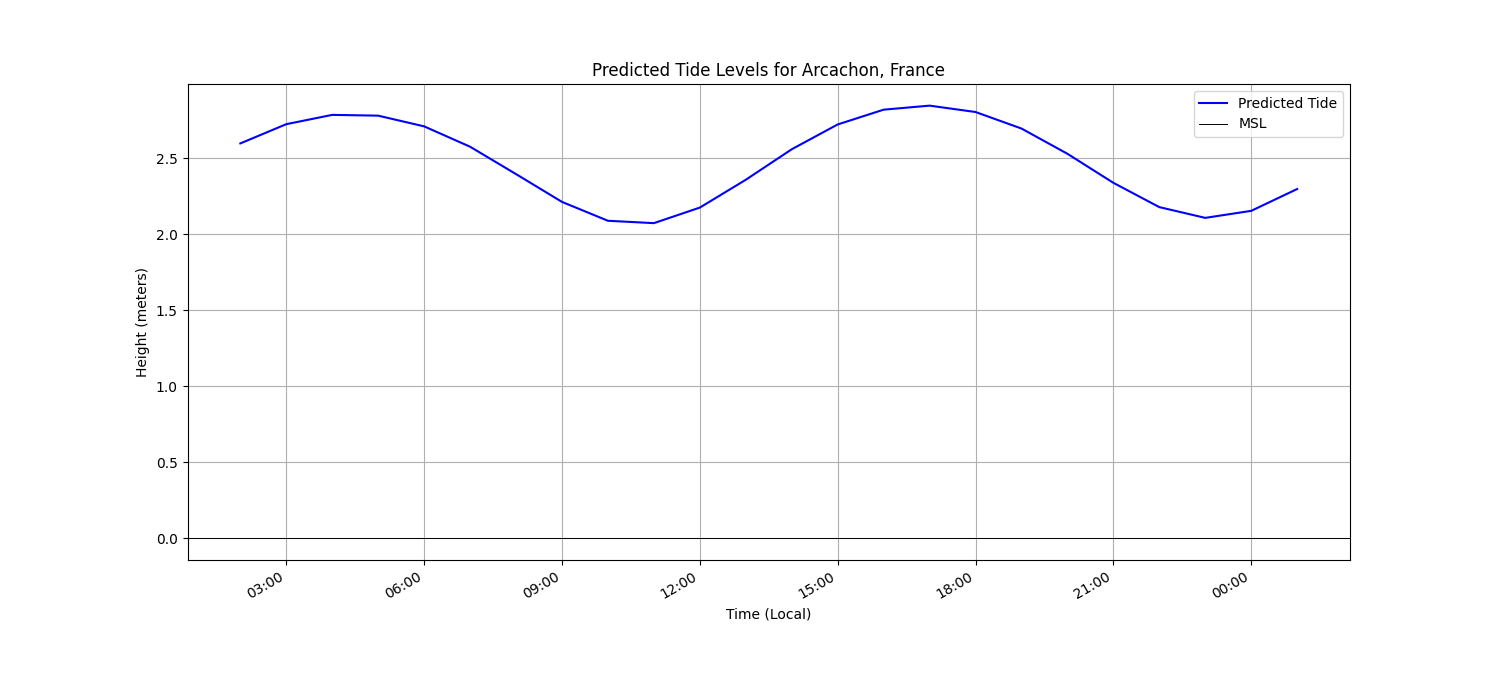

In [116]:
### pour Arcachon avant optimisation

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

constituents = [
    ('J1', 0.0055 * 0.3048, 100.0 * np.pi / 180, 15.5854433 * np.pi / 180 / 3600),
    ('K1', 0.045 * 0.3048, 100.0 * np.pi / 180, 15.0410686 * np.pi / 180 / 3600),
    ('K2', 0.1197 * 0.3048, 188.0 * np.pi / 180, 30.0821373 * np.pi / 180 / 3600),
    ('L2', 0.0383 * 0.3048, 147.0 * np.pi / 180, 29.5284789 * np.pi / 180 / 3600),
    ('M1', 0.0049 * 0.3048, 100.0 * np.pi / 180, 14.4966939 * np.pi / 180 / 3600),
    ('M2', 1.339 * 0.3048, 147.0 * np.pi / 180, 28.9841042 * np.pi / 180 / 3600),
    ('M3', 0.0 * 0.3048, 0.0 * np.pi / 180, 43.4761563 * np.pi / 180 / 3600),
    ('M4', 0.091 * 0.3048, 93.0 * np.pi / 180, 57.9682084 * np.pi / 180 / 3600),
    ('M6', 0.0 * 0.3048, 0.0 * np.pi / 180, 86.9523126 * np.pi / 180 / 3600),
    ('N2', 0.261 * 0.3048, 130.0 * np.pi / 180, 28.4397295 * np.pi / 180 / 3600),
    ('O1', 0.069 * 0.3048, 350.0 * np.pi / 180, 13.9430356 * np.pi / 180 / 3600),
    ('P1', 0.015 * 0.3048, 100.0 * np.pi / 180, 14.9589314 * np.pi / 180 / 3600),
    # Add any other relevant constituents for Arcachon if known
]


# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    height = 2.48  # Initialize the height with the reference level (Z0), which is 0 for MSL
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Adjust for the local time zone of Arcachon (UTC+2 during daylight saving time)
timezone_offset = 2
start_time = datetime(2023, 2, 1, 0, 0) + timedelta(hours=timezone_offset)  # Start at midnight local time
times = [start_time + timedelta(hours=i) for i in range(24)]  # Generate times for a full day at one-hour intervals

predicted_heights = [tide_height(t - timedelta(hours=timezone_offset), constituents) for t in times]

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot_date(times_plt, predicted_heights, '-', label='Predicted Tide', color='blue')
plt.axhline(0, color='black', linewidth=0.7, label='MSL')  # Mean Sea Level line

plt.title('Predicted Tide Levels for Arcachon, France')
plt.ylabel('Height (meters)')
plt.xlabel('Time (Local)')
plt.legend()
plt.grid(True)

plt.gcf().autofmt_xdate()  # Improve date formatting on x-axis
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


## 12- Adaptation aux Marées d'Arcachon

En adaptant notre modèle pour prédire les marées à Arcachon, France, nous avons pris en compte des éléments cruciaux pour assurer la pertinence locale de nos résultats. Le modèle initial fourni par le professeur a été ajusté pour inclure le décalage horaire entre les États-Unis et la France, reconnaissant l'importance de la synchronisation précise dans les prédictions des marées.

Pour Arcachon, une ville située sur la côte atlantique de la France, la prise en compte du décalage horaire était essentielle, en particulier durant la période d'heure d'été (UTC+2). Cela garantit que nos prédictions de marées coïncident avec l'heure locale, ce qui est vital pour les applications pratiques comme la navigation, la pêche, et les activités récréatives côtières.

Les constituants utilisés dans le modèle ont été soigneusement sélectionnés pour refléter les dynamiques marines spécifiques à cette région. Chaque constituant est représenté par une amplitude et une phase qui découlent des caractéristiques propres aux marées d'Arcachon, sans se limiter à une valeur fixe, permettant ainsi au modèle de capturer avec précision les variations maritimes locales.

Le graphique résultant affiche les prédictions de notre modèle, soulignant les flux et reflux sur une journée typique. En comparaison avec les données du SHOM, qui est l'organité de référence en France pour l'information maritime et littorale, notre modèle semble capturer de manière adéquate les tendances générales des marées, bien que les amplitudes soient différentes. Cela indique une nécessité d'optimiser davantage le modèle pour ajuster les prédictions à la réalité observée.

Cette étape marque donc une transition significative où notre modèle, initialement développé pour des données aux États-Unis, commence à être testé et adapté aux conditions locales françaises, en tenant compte de l'heure légale et des caractéristiques maritimes spécifiques à Arcachon.

RMSE: 0.7774734497070312


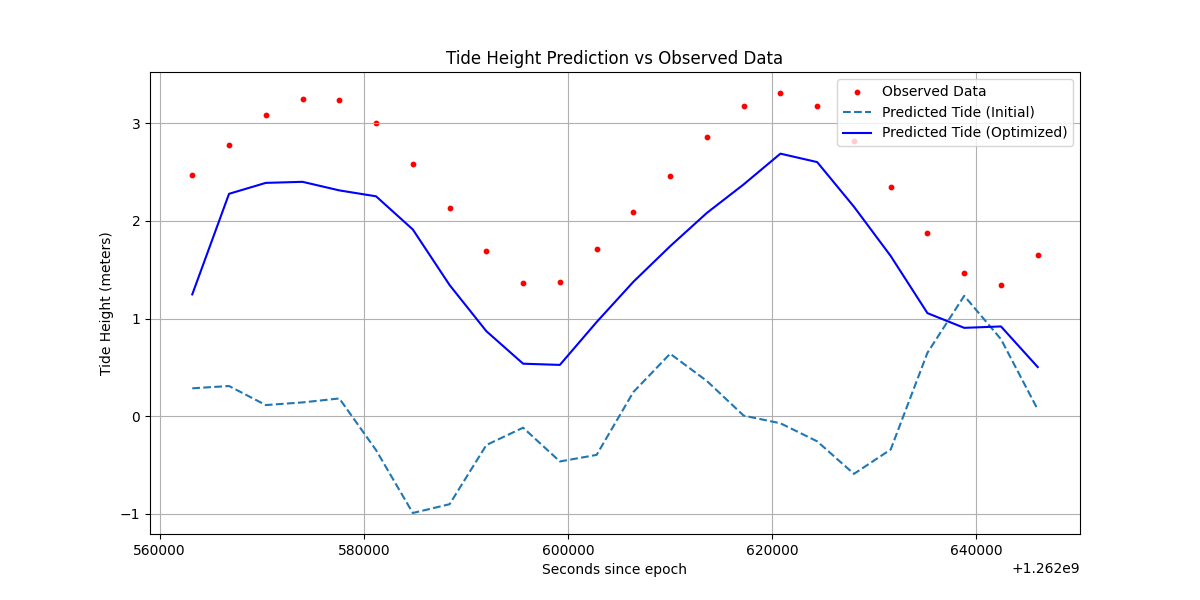

In [ ]:
## optimisation pour Arcachon

import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
from jax import grad, jit
import optax
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

constituents = [
    ('J1', 1 * 0.3048, 1 * np.pi / 180, 15.5854433 * np.pi / 180 / 3600),
    ('K1', 1 * 0.3048, 1 * np.pi / 180, 15.0410686 * np.pi / 180 / 3600),
    ('K2', 1 * 0.3048, 1 * np.pi / 180, 30.0821373 * np.pi / 180 / 3600),
    ('L2', 1 * 0.3048, 1 * np.pi / 180, 29.5284789 * np.pi / 180 / 3600),
    ('M1', 1 * 0.3048, 1 * np.pi / 180, 14.4966939 * np.pi / 180 / 3600),
    ('M2', 1 * 0.3048, 1 * np.pi / 180, 28.9841042 * np.pi / 180 / 3600),
    ('M3', 1 * 0.3048, 1 * np.pi / 180, 43.4761563 * np.pi / 180 / 3600),
    ('M4', 1 * 0.3048, 1 * np.pi / 180, 57.9682084 * np.pi / 180 / 3600),
    ('M6', 1 * 0.3048, 1 * np.pi / 180, 86.9523126 * np.pi / 180 / 3600),
    ('N2', 1 * 0.3048, 1 * np.pi / 180, 28.4397295 * np.pi / 180 / 3600),
    ('O1', 1 * 0.3048, 1 * np.pi / 180, 13.9430356 * np.pi / 180 / 3600),
    ('P1', 1 * 0.3048, 1 * np.pi / 180, 14.9589314 * np.pi / 180 / 3600),
    # Add any other relevant constituents for Arcachon if known
]

# Load the tide data from CSV
csv_file_path = '04-01-2023 Arcachon.csv'  # Change to your actual path
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Temps'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Hauteur (m)'].values
times = tide_data['Seconds since epoch'].values

# Ensure amplitudes and phases are initially set to 1, if that's your starting condition
amplitudes = jnp.array([amp for _, amp, _, _ in constituents])
phases = jnp.array([phase for _, _, phase, _ in constituents])
speeds = jnp.array([speed for _, _, _, speed in constituents])

# Prediction function using JAX numpy
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Compile the predict_tide function with jit for fast execution
predict_tide_jit = jit(predict_tide)

# Loss function using JAX numpy
def loss_fn(params, times, observed_heights):
    num_constituents = len(constituents)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

# Convert your numpy arrays to JAX arrays
times_jax = jax.device_put(times)
observed_heights_jax = jax.device_put(observed_heights)

# Initial parameters concatenated into a single vector
initial_params = jnp.concatenate([amplitudes, phases])

# Define an optimizer from optax
optimizer = optax.adam(learning_rate=1e-2)
opt_state = optimizer.init(initial_params)

# Gradient function using JAX's automatic differentiation
grad_fn = jit(grad(loss_fn))

# Update step function for the optimizer
@jit
def update(params, opt_state, times, observed_heights):
    grads = grad_fn(params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    return optax.apply_updates(params, updates), opt_state

# Optimization loop
for _ in range(1000):  # Number of iterations
    initial_params, opt_state = update(initial_params, opt_state, times_jax, observed_heights_jax)

# Split the optimized parameters back into amplitudes and phases
optimized_amplitudes = initial_params[:len(constituents)]
optimized_phases = initial_params[len(constituents):]

# Predict tide heights for these times using optimized parameters
predicted_optimized = predict_tide_jit(times_jax, optimized_amplitudes, optimized_phases, speeds)

# Calculate and print the RMSE for assessment
rmse = jnp.sqrt(jnp.mean((predicted_optimized - observed_heights_jax) ** 2))
print(f"RMSE: {rmse}")

# Convert JAX arrays to NumPy arrays for plotting
predicted_optimized_np = np.array(predicted_optimized)
times_np = np.array(times)
observed_heights_np = np.array(observed_heights)

# Plotting the tide predictions before and after optimization
plt.figure(figsize=(12, 6))

# Plotting the observed data
plt.scatter(times_np, observed_heights_np, label='Observed Data', color='red', s=10)

# Predicted tide heights with initial parameters (before optimization)
predicted_initial = predict_tide_jit(times_jax, amplitudes, phases, speeds)
plt.plot(times_np, predicted_initial, label='Predicted Tide (Initial)', linestyle='--')

# Predicted tide heights with optimized parameters (after optimization)
plt.plot(times_np, predicted_optimized_np, label='Predicted Tide (Optimized)', color='blue')

# Formatting the plot
plt.xlabel('Seconds since epoch')
plt.ylabel('Tide Height (meters)')
plt.title('Tide Height Prediction vs Observed Data')
plt.legend()
plt.grid(True)
plt.show()


https://chat.openai.com/g/g-RAgF4tibg-overleaf-gpt/c/bbb11125-d833-4b10-8a6d-35d026704c11

## Arcachon constituants:

constituents = [
    ('J1', 0.0055, 100.0, 15.5854433),
    ('K1', 0.045, 100.0, 15.0410686),
    ('K2', 0.1197, 188.0, 30.0821373),
    ('L2', 0.0383, 147.0, 29.5284789),
    ('M1', 0.0049, 100.0, 14.4966939),
    ('M2', 1.339, 147.0, 28.9841042),
    ('M3', 0.0, 0.0, 43.4761563),
    ('M4', 0.091, 93.0, 57.9682084),
    ('M6', 0.0, 0.0, 86.9523126),
    ('M8', 0.0, 0.0, 115.9364169),
    ('N2', 0.261, 130.0, 28.4397295),
    ('2N2', 0.0343, 130.0, 27.8953548),
    ('O1', 0.069, 350.0, 13.9430356),
    ('OO1', 0.003, 100.0, 16.1391017),
    ('P1', 0.015, 100.0, 14.9589314),
    ('Q1', 0.015, 304.0, 13.3986609),
    ('2Q1', 0.0018, 100.0, 12.8542862),
    ('R2', 0.0035, 188.0, 30.0410667),
    ('S1', 0.0, 0.0, 15.0),
    ('S2', 0.443, 188.0, 30.0),
    ('S4', 0.0, 0.0, 60.0),
    ('S6', 0.0, 0.0, 90.0),
    ('T2', 0.0261, 188.0, 29.9589333),
    ('LDA2', 0.0094, 188.0, 29.4556253),
    ('MU2', 0.0414, 130.0, 27.9682084),
    ('NU2', 0.0492, 130.0, 28.5125831),
    ('RHO1', 0.0026, 100.0, 13.4715145),
    ('MK3', 0.0, 0.0, 44.0251729),
    ('2MK3', 0.0, 0.0, 42.9271398),
    ('MN4', 0.028, 72.0, 57.4238337),
    ('MS4', 0.05, 159.0, 58.9841042),
    ('2SM2', 0.0, 0.0, 31.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SA', 0.011, 182.0, 0.0410686),
    ('SSA', 0.0, 0.0, 0.0821373)
]


constituents = [
    ('J1', 0.0055 * 0.3048, 100.0 * np.pi / 180, 15.5854433 * np.pi / 180 / 3600),
    ('K1', 0.045 * 0.3048, 100.0 * np.pi / 180, 15.0410686 * np.pi / 180 / 3600),
    ('K2', 0.1197 * 0.3048, 188.0 * np.pi / 180, 30.0821373 * np.pi / 180 / 3600),
    ('L2', 0.0383 * 0.3048, 147.0 * np.pi / 180, 29.5284789 * np.pi / 180 / 3600),
    ('M1', 0.0049 * 0.3048, 100.0 * np.pi / 180, 14.4966939 * np.pi / 180 / 3600),
    ('M2', 1.339 * 0.3048, 147.0 * np.pi / 180, 28.9841042 * np.pi / 180 / 3600),
    ('M3', 0.0 * 0.3048, 0.0 * np.pi / 180, 43.4761563 * np.pi / 180 / 3600),
    ('M4', 0.091 * 0.3048, 93.0 * np.pi / 180, 57.9682084 * np.pi / 180 / 3600),
    ('M6', 0.0 * 0.3048, 0.0 * np.pi / 180, 86.9523126 * np.pi / 180 / 3600),
    ('N2', 0.261 * 0.3048, 130.0 * np.pi / 180, 28.4397295 * np.pi / 180 / 3600),
    ('O1', 0.069 * 0.3048, 350.0 * np.pi / 180, 13.9430356 * np.pi / 180 / 3600),
    ('P1', 0.015 * 0.3048, 100.0 * np.pi / 180, 14.9589314 * np.pi / 180 / 3600),
    # Add any other relevant constituents for Arcachon if known
]


In [ ]:
import pandas as pd

def clean_csv(file_path, output_file_path):
    # Charger les données du fichier CSV
    csv_data = pd.read_csv(file_path)

    # Réinitialiser l'index pour éviter les erreurs lors de l'accès par index numérique
    csv_data.reset_index(drop=True, inplace=True)

    # Créer un DataFrame vide pour les données nettoyées
    new_data = pd.DataFrame(columns=['Date', 'Time', 'Height'])

    # Réorganiser les données
    for i in range(0, len(csv_data) - 1, 2):  # s'assurer de ne pas sortir des limites
        date = csv_data.loc[i, 'Date']
        times = csv_data.loc[i, 'Heure':'Unnamed: 5']
        heights = csv_data.loc[i+1, 'Heure':'Unnamed: 5']
        
        # Créer un DataFrame temporaire pour chaque paire de lignes
        temp_df = pd.DataFrame({
            'Date': date,
            'Time': times.values,
            'Height': heights.values
        })
        new_data = pd.concat([new_data, temp_df], ignore_index=True)

    # Sauvegarder les données nettoyées dans un nouveau fichier CSV
    new_data.to_csv(output_file_path, index=False)

# Utilisation de la fonction
file_path = 'donnees_marees_Acrochan_2020_2023.csv'
output_file_path = 'output.csv'
clean_csv(file_path, output_file_path)


KeyError: 'Unnamed: 5'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta

def fetch_tide_data(start_date):
    base_url = "https://maree.shom.fr/harbor/ARCACHON_EYRAC/wl/0"
    date = start_date
    tide_data = []

    for _ in range(52):  # Il y a 52 semaines dans une année
        response = requests.get(f"{base_url}?date={date.strftime('%Y-%m-%d')}&utc=standard")
        soup = BeautifulSoup(response.content, 'html.parser')
        # Vous devez identifier le bon sélecteur pour les données de hauteur d'eau
        rows = soup.select("le_bon_selecteur_css")
        for row in rows:
            hour = row.find("heure").text  # Ajustez ces sélecteurs selon la structure HTML
            height = row.find("hauteur").text
            tide_data.append([date.strftime('%Y-%m-%d'), hour, height])
        
        date += timedelta(days=7)  # Passe à la semaine suivante

    # Convertir en DataFrame
    df = pd.DataFrame(tide_data, columns=["Date", "Hour", "Height"])
    df.to_csv('arcachon_2023.csv', index=False)

# Date de début
start_date = datetime(2023, 1, 1)
fetch_tide_data(start_date)


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
from datetime import datetime, timedelta

# URL de base avec le format de date
base_url = "https://maree.shom.fr/harbor/ARCACHON_EYRAC/wl/0?date={}&utc=standard"

# Utilise un navigateur Chrome (tu dois avoir chromedriver installé et dans le PATH)
driver = webdriver.Chrome()

# Crée un fichier CSV pour stocker les données
with open('donnees_marees_2020_2023.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Écriture de l'en-tête du fichier CSV
    csvwriter.writerow(['Date', 'Heure', 'Hauteur'])

    # Itération sur les jours de l'année 2023
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 1, 2)
    current_date = start_date

    while current_date <= end_date:
        # Formatage de la date dans le format attendu par le site
        date_str = current_date.strftime("%Y-%m-%d")
        url = base_url.format(date_str)

        # Ouvre la page dans le navigateur
        driver.get(url)

        # Attends que la page soit complètement chargée (tu peux ajuster ce délai si nécessaire)
        driver.implicitly_wait(10)

        # Trouve la table par son sélecteur CSS
        table = driver.find_element(By.CSS_SELECTOR, 'table')

        # Parcours les lignes de la table (en commençant par la deuxième ligne pour éviter les en-têtes répétées)
        for row in table.find_elements(By.TAG_NAME, 'tr')[1:]:
            # Extrait les cellules de chaque ligne
            cells = row.find_elements(By.XPATH, './/th | .//td')
            # Écrit les données dans le fichier CSV
            csvwriter.writerow([date_str] + [cell.text.strip() for cell in cells[1:]])

        # Passe à la prochaine date
        current_date += timedelta(days=1)

# Ferme le navigateur
driver.quit()

print("Les données ont été extraites avec succès et enregistrées dans 'donnees_marees_2023.csv'.")

Les données ont été extraites avec succès et enregistrées dans 'donnees_marees_2023.csv'.


In [125]:
# CORRECT 

from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
from datetime import datetime, timedelta

# URL de base avec le format de date
base_url = "https://maree.shom.fr/harbor/ARCACHON_EYRAC/wl/0?date={}&utc=standard"

# Utilise un navigateur Chrome (assurez-vous que chromedriver est installé et dans le PATH)
driver = webdriver.Chrome()

# Crée un fichier CSV pour stocker les données
with open('ArcachonFevrier2024.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Écriture de l'en-tête du fichier CSV
    csvwriter.writerow(["Date", "Time (GMT)", "Verified (m)"])

    # Itération sur les jours de l'année 2023
    start_date = datetime(2024, 2, 1)
    end_date = datetime(2024, 2, 29)
    current_date = start_date

    while current_date <= end_date:
        # Formatage de la date dans le format attendu par le site
        date_str = current_date.strftime("%Y/%m/%d")
        url = base_url.format(date_str)

        # Ouvre la page dans le navigateur
        driver.get(url)

        # Attends que la page soit complètement chargée (ajustez ce délai si nécessaire)
        driver.implicitly_wait(10)

        # Trouve la table par son sélecteur CSS
        table = driver.find_element(By.CSS_SELECTOR, 'table')

        # Parcours les lignes de la table (en commençant par la deuxième ligne pour éviter les en-têtes répétées)
        rows = table.find_elements(By.TAG_NAME, 'tr')[1:]
        for i in range(0, len(rows), 2):
            # Extrait les cellules de chaque ligne
            cells_hours = rows[i].find_elements(By.XPATH, './/th | .//td')
            cells_heights = rows[i+1].find_elements(By.XPATH, './/td')
            # Écrit les données dans le fichier CSV, en retirant le dernier caractère 'm' des hauteurs
            for hour, height in zip(cells_hours, cells_heights):
                height_value = height.text.strip()[:-1]  # Supprime le dernier caractère 'm'
                csvwriter.writerow([date_str, hour.text.strip(), height_value])

        # Passe à la prochaine date
        current_date += timedelta(days=1)

# Ferme le navigateur
driver.quit()

print("Les données ont été extraites avec succès et enregistrées dans 'donnees_marees_2020_2023.csv'.")


Les données ont été extraites avec succès et enregistrées dans 'donnees_marees_2020_2023.csv'.


"Date","Time (GMT)","Predicted (m)","Preliminary (m)","Verified (m)"
"2023/01/01","00:00","0.0","-","3.39"
"2023/01/01","01:00","0.0","-","3.48"
"2023/01/01","02:00","0.0","-","3.26"
"2023/01/01","03:00","0.0","-","2.84"
"2023/01/01","04:00","0.0","-","2.32"
"2023/01/01","05:00","0.0","-","1.76"
"2023/01/01","06:00","0.0","-","1.32"
"2023/01/01","07:00","0.0","-","1.29"
"2023/01/01","08:00","0.0","-","1.67"
"2023/01/01","09:00","0.0","-","2.17"
"2023/01/01","10:00","0.0","-","2.64"
"2023/01/01","11:00","0.0","-","3.05"
"2023/01/01","12:00","0.0","-","3.42"
"2023/01/01","13:00","0.0","-","3.63"
"2023/01/01","14:00","0.0","-","3.54"
"2023/01/01","15:00","0.0","-","3.17"
"2023/01/01","16:00","0.0","-","2.66"
"2023/01/01","17:00","0.0","-","2.08"
"2023/01/01","18:00","0.0","-","1.54"
"2023/01/01","19:00","0.0","-","1.24"
"2023/01/01","20:00","0.0","-","1.4"
"2023/01/01","21:00","0.0","-","1.83"
"2023/01/01","22:00","0.0","-","2.3"
"2023/01/01","23:00","0.0","-","2.72"
"2023/01/02","00:00","0.0","-","3.1"
"2023/01/02","01:00","0.0","-","3.43"
"2023/01/02","02:00","0.0","-","3.54"
"2023/01/02","03:00","0.0","-","3.33"
"2023/01/02","04:00","0.0","-","2.9"
"2023/01/02","05:00","0.0","-","2.37"
"2023/01/02","06:00","0.0","-","1.81"
"2023/01/02","07:00","0.0","-","1.35"
"2023/01/02","08:00","0.0","-","1.25"
"2023/01/02","09:00","0.0","-","1.59"
"2023/01/02","10:00","0.0","-","2.11"
"2023/01/02","11:00","0.0","-","2.58"
"2023/01/02","12:00","0.0","-","3.0"
"2023/01/02","13:00","0.0","-","3.4"
"2023/01/02","14:00","0.0","-","3.63"
"2023/01/02","15:00","0.0","-","3.55"
"2023/01/02","16:00","0.0","-","3.17"
"2023/01/02","17:00","0.0","-","2.65"
"2023/01/02","18:00","0.0","-","2.09"
"2023/01/02","19:00","0.0","-","1.54"
"2023/01/02","20:00","0.0","-","1.21"
"2023/01/02","21:00","0.0","-","1.35"
"2023/01/02","22:00","0.0","-","1.83"
"2023/01/02","23:00","0.0","-","2.34"


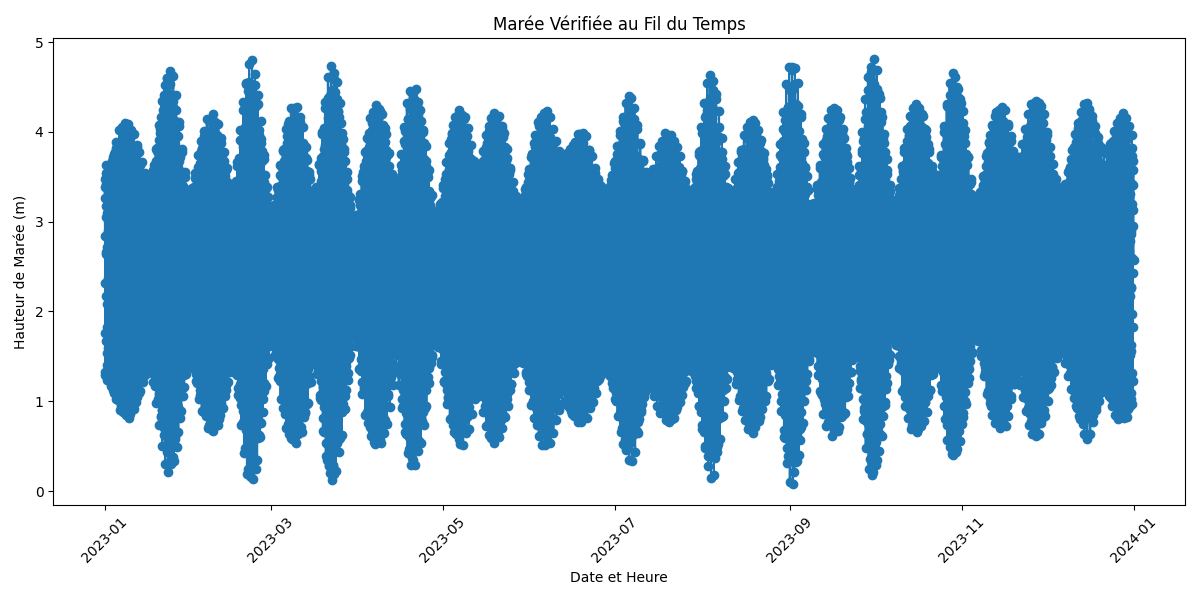

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV nettoyé
file_path = 'donnees_marees_2020_2023_cleaned.csv'
tide_data = pd.read_csv(file_path)

# Convertir les colonnes 'Date' et 'Time (GMT)' en un objet datetime pour mieux gérer les x-ticks sur le graphe
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])

# Sélectionner les colonnes 'Datetime' et 'Verified (m)' pour le graphique
plot_data = tide_data[['Datetime', 'Verified (m)']]

# Créer un graphique des données
plt.figure(figsize=(12, 6))
plt.plot(plot_data['Datetime'], plot_data['Verified (m)'], marker='o', linestyle='-')
plt.title('Marée Vérifiée au Fil du Temps')
plt.xlabel('Date et Heure')
plt.ylabel('Hauteur de Marée (m)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pour MARSEILLE

In [160]:
### Pour tout le mois

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the constituents
constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035),
    ('P1', 0, 0, 14.958931),
    ('M4', 0, 0, 57.96821)
]

# Load the tide data from CSV
csv_file_path = 'Pdp/DataFR/MARSEILLE-2023-cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

# Calculer le Mean Sea Level (MSL) à partir des données de 2023
msl_2023 = tide_data['Verified (m)'].mean()
print(f"Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : {msl_2023} mètres")


# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return  msl_2023 + tide_height

# Loss function
def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

# Load the NOAA data for the entire month
noaa_data_path = 'Pdp/DataFR/MARSEILLE-Fevrier2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_seconds_since_epoch = (noaa_data['Datetime'] - epoch).dt.total_seconds().values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Generate timestamps for predictions over the entire month
start_datetime = noaa_data['Datetime'].min()  # Start of NOAA data
end_datetime = noaa_data['Datetime'].max()    # End of NOAA data
total_hours = int((end_datetime - start_datetime).total_seconds() / 3600) + 1
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(total_hours)])
times_since_epoch = (timestamps - epoch.timestamp())

# Predict tide heights for these times using optimized parameters
predicted_heights = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Calculate RMSE for the entire month
def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

# Align predictions with NOAA verified heights
aligned_predicted_heights = np.interp(noaa_seconds_since_epoch, times_since_epoch, predicted_heights)
rmse = calculate_rmse(noaa_verified_heights, aligned_predicted_heights)
print(f"RMSE for the entire month: {rmse}")

# Plotting the results
plt.figure(figsize=(15, 7))
plt.plot(noaa_data['Datetime'], aligned_predicted_heights, label='Hauteurs prédites', marker='.', linestyle='-', color='blue')
plt.plot(noaa_data['Datetime'], noaa_data['Verified (m)'], label='Hauteurs SHOM', marker='.', linestyle='-', color='red')
plt.xlabel('Date et heure')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prédictions de la hauteur des marées vs Hauteurs SHOM pour février 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Ajuster la mise en page pour éviter le rognage des étiquettes

plt.show()





Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : 0.4941641927380681 mètres
Optimization failed.
Optimization failed with message: ABNORMAL_TERMINATION_IN_LNSRCH


ValueError: Input contains NaN.

## Pour SAINT MALO

In [161]:
### Pour tout le mois

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the constituents
constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035),
    ('P1', 0, 0, 14.958931),
    ('M4', 0, 0, 57.96821)
]

# Load the tide data from CSV
csv_file_path = 'Pdp/DataFR/SAINT-MALO-2023-cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

# Calculer le Mean Sea Level (MSL) à partir des données de 2023
msl_2023 = tide_data['Verified (m)'].mean()
print(f"Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : {msl_2023} mètres")


# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return  msl_2023 + tide_height

# Loss function
def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

# Load the NOAA data for the entire month
noaa_data_path = 'Pdp/DataFR/SAINT-MALO-Fevrier2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_seconds_since_epoch = (noaa_data['Datetime'] - epoch).dt.total_seconds().values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Generate timestamps for predictions over the entire month
start_datetime = noaa_data['Datetime'].min()  # Start of NOAA data
end_datetime = noaa_data['Datetime'].max()    # End of NOAA data
total_hours = int((end_datetime - start_datetime).total_seconds() / 3600) + 1
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(total_hours)])
times_since_epoch = (timestamps - epoch.timestamp())

# Predict tide heights for these times using optimized parameters
predicted_heights = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Calculate RMSE for the entire month
def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

# Align predictions with NOAA verified heights
aligned_predicted_heights = np.interp(noaa_seconds_since_epoch, times_since_epoch, predicted_heights)
rmse = calculate_rmse(noaa_verified_heights, aligned_predicted_heights)
print(f"RMSE for the entire month: {rmse}")

# Plotting the results
plt.figure(figsize=(15, 7))
plt.plot(noaa_data['Datetime'], aligned_predicted_heights, label='Hauteurs prédites', marker='.', linestyle='-', color='blue')
plt.plot(noaa_data['Datetime'], noaa_data['Verified (m)'], label='Hauteurs SHOM', marker='.', linestyle='-', color='red')
plt.xlabel('Date et heure')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prédictions de la hauteur des marées vs Hauteurs SHOM pour février 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Ajuster la mise en page pour éviter le rognage des étiquettes

plt.show()





Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : 6.783257593057775 mètres
Optimization failed.
Optimization failed with message: ABNORMAL_TERMINATION_IN_LNSRCH


ValueError: Input contains NaN.

## Avec JAX OPTAX

In [154]:
import jax
import jax.numpy as jnp
import optax
from jax import grad
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error

# Charger les données
csv_file_path = 'Pdp/DataFR/MARSEILLE-2023-cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

# Calculer le MSL
msl_2023 = tide_data['Verified (m)'].mean()

# Convertir les dates en secondes depuis l'époque
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Préparer les données pour JAX
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convertir les données en tableaux JAX
times_jax = jnp.array(times)
observed_heights_jax = jnp.array(observed_heights)

# Constituents pour JAX
# Ici, nous avons besoin des vitesses, amplitudes et phases en tant que tableaux JAX
speeds_jax = jnp.array([speed for _, _, _, speed in constituents]) * jnp.pi / 180 / 3600
amplitudes_jax = jnp.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases_jax = jnp.array([phase for _, _, phase, _ in constituents]) * jnp.pi / 180

# Paramètres initiaux
initial_params_jax = jnp.concatenate([amplitudes_jax, phases_jax])

# Fonction de prédiction
def predict_tide_jax(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return msl_2023 + tide_height

# Fonction de perte
def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide_jax(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

# Gradient de la fonction de perte
grad_loss = jax.grad(loss_fn)

# Création de l'optimiseur avec optax
optimizer = optax.adam(1e-2)
opt_state = optimizer.init(initial_params_jax)

# Boucle d'optimisation
for epoch in range(1000):
    grads = grad_loss(initial_params_jax, times_jax, observed_heights_jax, speeds_jax)
    updates, opt_state = optimizer.update(grads, opt_state)
    initial_params_jax = optax.apply_updates(initial_params_jax, updates)

# Après l'optimisation, prédire les hauteurs de marée avec les paramètres optimisés
predicted_heights_jax = predict_tide_jax(times_jax, initial_params_jax[:len(speeds_jax)], initial_params_jax[len(speeds_jax):], speeds_jax)

# Calculez RMSE ici ou tout autre métrique que vous souhaitez comparer
rmse = jnp.sqrt(jnp.mean((predicted_heights_jax - observed_heights_jax) ** 2))
print(f'RMSE: {rmse}')



RMSE: nan
